In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


Downloaded a sample dataset from Kaggle

In [3]:
import pandas as pd
forsale_df=pd.read_csv('gdrive/My Drive/DSFinalCapstone/ForSaleInventory.csv')

In [16]:
meandaystopend_df=pd.read_csv('gdrive/My Drive/DSFinalCapstone/Mean_Dasys_To_Pending.csv')

In [20]:
meandaystoclose_df=pd.read_csv('gdrive/My Drive/DSFinalCapstone/Mean_Days_To_Close.csv')

In [21]:
mean_Price_Cut_df=pd.read_csv('gdrive/My Drive/DSFinalCapstone/Mean_Price_Cut.csv')

In [22]:
mean_Sale_To_List_Ratio_df=pd.read_csv('gdrive/My Drive/DSFinalCapstone/Mean_Sale_To_List_Ratio.csv')

In [23]:
median_Sale_Price_df=pd.read_csv('gdrive/My Drive/DSFinalCapstone/Median_Sale_Price.csv')

In [24]:
median_Sale_To_List_Ratio_df=pd.read_csv('gdrive/My Drive/DSFinalCapstone/Median_Sale_To_List_Ratio.csv')

In [25]:
new_Const_Sales_Count_df=pd.read_csv('gdrive/My Drive/DSFinalCapstone/New_Const_Sales_Count.csv')

In [26]:
sales_Count_df=pd.read_csv('gdrive/My Drive/DSFinalCapstone/Sales_Count.csv')

In [27]:
soldAboveList_df=pd.read_csv('gdrive/My Drive/DSFinalCapstone/SoldAboveList.csv')

In [28]:
soldBelowList_df=pd.read_csv('gdrive/My Drive/DSFinalCapstone/SoldBelowList.csv')

In [4]:
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
import warnings

warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [5]:
forsale_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 928 entries, 0 to 927
Data columns (total 76 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   RegionID    928 non-null    int64  
 1   SizeRank    928 non-null    int64  
 2   RegionName  928 non-null    object 
 3   RegionType  928 non-null    object 
 4   StateName   927 non-null    object 
 5   2018-03-31  899 non-null    float64
 6   2018-04-30  899 non-null    float64
 7   2018-05-31  899 non-null    float64
 8   2018-06-30  900 non-null    float64
 9   2018-07-31  900 non-null    float64
 10  2018-08-31  900 non-null    float64
 11  2018-09-30  900 non-null    float64
 12  2018-10-31  900 non-null    float64
 13  2018-11-30  900 non-null    float64
 14  2018-12-31  900 non-null    float64
 15  2019-01-31  900 non-null    float64
 16  2019-02-28  900 non-null    float64
 17  2019-03-31  900 non-null    float64
 18  2019-04-30  900 non-null    float64
 19  2019-05-31  900 non-null    f

In [29]:
mean_Price_Cut_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 78 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   RegionID    636 non-null    int64  
 1   SizeRank    636 non-null    int64  
 2   RegionName  636 non-null    object 
 3   RegionType  636 non-null    object 
 4   StateName   635 non-null    object 
 5   2018-01-31  323 non-null    float64
 6   2018-02-28  323 non-null    float64
 7   2018-03-31  323 non-null    float64
 8   2018-04-30  323 non-null    float64
 9   2018-05-31  324 non-null    float64
 10  2018-06-30  324 non-null    float64
 11  2018-07-31  324 non-null    float64
 12  2018-08-31  324 non-null    float64
 13  2018-09-30  324 non-null    float64
 14  2018-10-31  324 non-null    float64
 15  2018-11-30  324 non-null    float64
 16  2018-12-31  324 non-null    float64
 17  2019-01-31  325 non-null    float64
 18  2019-02-28  325 non-null    float64
 19  2019-03-31  325 non-null    f

In [17]:
meandaystopend_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 669 entries, 0 to 668
Data columns (total 76 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   RegionID    669 non-null    int64  
 1   SizeRank    669 non-null    int64  
 2   RegionName  669 non-null    object 
 3   RegionType  669 non-null    object 
 4   StateName   668 non-null    object 
 5   2018-03-31  375 non-null    float64
 6   2018-04-30  378 non-null    float64
 7   2018-05-31  378 non-null    float64
 8   2018-06-30  379 non-null    float64
 9   2018-07-31  381 non-null    float64
 10  2018-08-31  382 non-null    float64
 11  2018-09-30  382 non-null    float64
 12  2018-10-31  383 non-null    float64
 13  2018-11-30  388 non-null    float64
 14  2018-12-31  390 non-null    float64
 15  2019-01-31  402 non-null    float64
 16  2019-02-28  405 non-null    float64
 17  2019-03-31  410 non-null    float64
 18  2019-04-30  411 non-null    float64
 19  2019-05-31  411 non-null    f

In [6]:
forsale_df['2018_ForSaleInv'] = (forsale_df['2018-03-31'] + forsale_df['2018-04-30']+forsale_df['2018-05-31'] + forsale_df['2018-06-30']+forsale_df['2018-07-31'] + forsale_df['2018-08-31']+forsale_df['2018-09-30'] + forsale_df['2018-10-31']+forsale_df['2018-11-30'] + forsale_df['2018-12-31'])/10

In [7]:
forsale_df['2019_ForSaleInv'] = (forsale_df['2019-01-31'] + forsale_df['2019-02-28']+forsale_df['2019-03-31'] + forsale_df['2019-04-30']+forsale_df['2019-05-31'] + forsale_df['2019-06-30']+forsale_df['2019-07-31'] + forsale_df['2019-08-31']+forsale_df['2019-09-30'] + forsale_df['2019-10-31']+forsale_df['2019-11-30'] + forsale_df['2019-12-31'])/12

In [8]:
forsale_df['2020_ForSaleInv'] = (forsale_df['2020-01-31'] + forsale_df['2020-02-29']+forsale_df['2020-03-31'] + forsale_df['2020-04-30']+forsale_df['2020-05-31'] + forsale_df['2020-06-30']+forsale_df['2020-07-31'] + forsale_df['2020-08-31']+forsale_df['2020-09-30'] + forsale_df['2020-10-31']+forsale_df['2020-11-30'] + forsale_df['2020-12-31'])/12

In [9]:
forsale_df['2021_ForSaleInv'] = (forsale_df['2021-01-31'] + forsale_df['2021-02-28']+forsale_df['2021-03-31'] + forsale_df['2021-04-30']+forsale_df['2021-05-31'] + forsale_df['2021-06-30']+forsale_df['2021-07-31'] + forsale_df['2021-08-31']+forsale_df['2021-09-30'] + forsale_df['2021-10-31']+forsale_df['2021-11-30'] + forsale_df['2021-12-31'])/12

In [10]:
forsale_df['2022_ForSaleInv'] = (forsale_df['2022-01-31'] + forsale_df['2022-02-28']+forsale_df['2022-03-31'] + forsale_df['2022-04-30']+forsale_df['2022-05-31'] + forsale_df['2022-06-30']+forsale_df['2022-07-31'] + forsale_df['2022-08-31']+forsale_df['2022-09-30'] + forsale_df['2022-10-31']+forsale_df['2022-11-30'] + forsale_df['2022-12-31'])/12

In [11]:
forsale_df['2023_ForSaleInv'] = (forsale_df['2023-01-31'] + forsale_df['2023-02-28']+forsale_df['2023-03-31'] + forsale_df['2023-04-30']+forsale_df['2023-05-31'] + forsale_df['2023-06-30']+forsale_df['2023-07-31'] + forsale_df['2023-08-31']+forsale_df['2023-09-30'] + forsale_df['2023-10-31']+forsale_df['2023-11-30'] + forsale_df['2023-12-31'])/12

In [12]:
forsale_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 928 entries, 0 to 927
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RegionID         928 non-null    int64  
 1   SizeRank         928 non-null    int64  
 2   RegionName       928 non-null    object 
 3   RegionType       928 non-null    object 
 4   StateName        927 non-null    object 
 5   2018-03-31       899 non-null    float64
 6   2018-04-30       899 non-null    float64
 7   2018-05-31       899 non-null    float64
 8   2018-06-30       900 non-null    float64
 9   2018-07-31       900 non-null    float64
 10  2018-08-31       900 non-null    float64
 11  2018-09-30       900 non-null    float64
 12  2018-10-31       900 non-null    float64
 13  2018-11-30       900 non-null    float64
 14  2018-12-31       900 non-null    float64
 15  2019-01-31       900 non-null    float64
 16  2019-02-28       900 non-null    float64
 17  2019-03-31      

In [13]:
forSale1_df = forsale_df[['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName', '2018_ForSaleInv', '2019_ForSaleInv', '2020_ForSaleInv', '2021_ForSaleInv', '2022_ForSaleInv', '2023_ForSaleInv']]

In [14]:
forSale1_df.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,2018_ForSaleInv,2019_ForSaleInv,2020_ForSaleInv,2021_ForSaleInv,2022_ForSaleInv,2023_ForSaleInv
0,102001,0,United States,country,NaN,1622589.7,1.564764e+06,1.268222e+06,970389.166667,924417.166667,908731.666667
1,394913,1,"New York, NY",msa,NY,86163.5,8.722208e+04,7.530417e+04,65572.666667,54850.833333,43696.666667
2,753899,2,"Los Angeles, CA",msa,CA,27650.2,2.867167e+04,2.282792e+04,20019.750000,18466.416667,15646.500000
3,394463,3,"Chicago, IL",msa,IL,46019.5,4.623083e+04,3.967542e+04,34665.416667,27521.666667,22391.333333
4,394514,4,"Dallas, TX",msa,TX,30125.8,3.218767e+04,2.768892e+04,20681.916667,18762.666667,20926.750000


In [18]:
meandaystopend_df['2018_MeanDaysToPend'] = (meandaystopend_df['2018-03-31'] + meandaystopend_df['2018-04-30']+meandaystopend_df['2018-05-31'] + meandaystopend_df['2018-06-30']+meandaystopend_df['2018-07-31'] + meandaystopend_df['2018-08-31']+meandaystopend_df['2018-09-30'] + meandaystopend_df['2018-10-31']+meandaystopend_df['2018-11-30'] + meandaystopend_df['2018-12-31'])/10

meandaystopend_df['2019_MeanDaysToPend'] = (meandaystopend_df['2019-01-31'] + meandaystopend_df['2019-02-28']+meandaystopend_df['2019-03-31'] + meandaystopend_df['2019-04-30']+meandaystopend_df['2019-05-31'] + meandaystopend_df['2019-06-30']+meandaystopend_df['2019-07-31'] + meandaystopend_df['2019-08-31']+meandaystopend_df['2019-09-30'] + meandaystopend_df['2019-10-31']+meandaystopend_df['2019-11-30'] + meandaystopend_df['2019-12-31'])/12

meandaystopend_df['2020_MeanDaysToPend'] = (meandaystopend_df['2020-01-31'] + meandaystopend_df['2020-02-29']+meandaystopend_df['2020-03-31'] + meandaystopend_df['2020-04-30']+meandaystopend_df['2020-05-31'] + meandaystopend_df['2020-06-30']+meandaystopend_df['2020-07-31'] + meandaystopend_df['2020-08-31']+meandaystopend_df['2020-09-30'] + meandaystopend_df['2020-10-31']+meandaystopend_df['2020-11-30'] + meandaystopend_df['2020-12-31'])/12

meandaystopend_df['2021_MeanDaysToPend'] = (meandaystopend_df['2021-01-31'] + meandaystopend_df['2021-02-28']+meandaystopend_df['2021-03-31'] + meandaystopend_df['2021-04-30']+meandaystopend_df['2021-05-31'] + meandaystopend_df['2021-06-30']+meandaystopend_df['2021-07-31'] + meandaystopend_df['2021-08-31']+meandaystopend_df['2021-09-30'] + meandaystopend_df['2021-10-31']+meandaystopend_df['2021-11-30'] + meandaystopend_df['2021-12-31'])/12

meandaystopend_df['2022_MeanDaysToPend'] = (meandaystopend_df['2022-01-31'] + meandaystopend_df['2022-02-28']+meandaystopend_df['2022-03-31'] + meandaystopend_df['2022-04-30']+meandaystopend_df['2022-05-31'] + meandaystopend_df['2022-06-30']+meandaystopend_df['2022-07-31'] + meandaystopend_df['2022-08-31']+meandaystopend_df['2022-09-30'] + meandaystopend_df['2022-10-31']+meandaystopend_df['2022-11-30'] + meandaystopend_df['2022-12-31'])/12

meandaystopend_df['2023_MeanDaysToPend'] = (meandaystopend_df['2023-01-31'] + meandaystopend_df['2023-02-28']+meandaystopend_df['2023-03-31'] + meandaystopend_df['2023-04-30']+meandaystopend_df['2023-05-31'] + meandaystopend_df['2023-06-30']+meandaystopend_df['2023-07-31'] + meandaystopend_df['2023-08-31']+meandaystopend_df['2023-09-30'] + meandaystopend_df['2023-10-31']+meandaystopend_df['2023-11-30'] + meandaystopend_df['2023-12-31'])/12

meanDaysToPend1_df = meandaystopend_df[['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName', '2018_MeanDaysToPend', '2019_MeanDaysToPend', '2020_MeanDaysToPend', '2021_MeanDaysToPend', '2022_MeanDaysToPend', '2023_MeanDaysToPend']]

In [19]:
meanDaysToPend1_df.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,2018_MeanDaysToPend,2019_MeanDaysToPend,2020_MeanDaysToPend,2021_MeanDaysToPend,2022_MeanDaysToPend,2023_MeanDaysToPend
0,102001,0,United States,country,NaN,50.6,61.500000,54.583333,31.166667,28.500000,40.083333
1,394913,1,"New York, NY",msa,NY,73.6,92.000000,83.250000,67.416667,58.166667,61.416667
2,753899,2,"Los Angeles, CA",msa,CA,37.9,49.916667,38.750000,26.916667,27.916667,37.250000
3,394463,3,"Chicago, IL",msa,IL,49.0,61.583333,57.166667,35.666667,31.750000,34.083333
4,394514,4,"Dallas, TX",msa,TX,45.0,57.250000,52.833333,31.416667,24.166667,37.416667


In [30]:
mean_Price_Cut_df['2018_mean_Price_Cut'] = (mean_Price_Cut_df['2018-03-31'] + mean_Price_Cut_df['2018-04-30']+mean_Price_Cut_df['2018-05-31'] + mean_Price_Cut_df['2018-06-30']+mean_Price_Cut_df['2018-07-31'] + mean_Price_Cut_df['2018-08-31']+mean_Price_Cut_df['2018-09-30'] + mean_Price_Cut_df['2018-10-31']+mean_Price_Cut_df['2018-11-30'] + mean_Price_Cut_df['2018-12-31'])/10

mean_Price_Cut_df['2019_mean_Price_Cut'] = (mean_Price_Cut_df['2019-01-31'] + mean_Price_Cut_df['2019-02-28']+mean_Price_Cut_df['2019-03-31'] + mean_Price_Cut_df['2019-04-30']+mean_Price_Cut_df['2019-05-31'] + mean_Price_Cut_df['2019-06-30']+mean_Price_Cut_df['2019-07-31'] + mean_Price_Cut_df['2019-08-31']+mean_Price_Cut_df['2019-09-30'] + mean_Price_Cut_df['2019-10-31']+mean_Price_Cut_df['2019-11-30'] + mean_Price_Cut_df['2019-12-31'])/12

mean_Price_Cut_df['2020_mean_Price_Cut'] = (mean_Price_Cut_df['2020-01-31'] + mean_Price_Cut_df['2020-02-29']+mean_Price_Cut_df['2020-03-31'] + mean_Price_Cut_df['2020-04-30']+mean_Price_Cut_df['2020-05-31'] + mean_Price_Cut_df['2020-06-30']+mean_Price_Cut_df['2020-07-31'] + mean_Price_Cut_df['2020-08-31']+mean_Price_Cut_df['2020-09-30'] + mean_Price_Cut_df['2020-10-31']+mean_Price_Cut_df['2020-11-30'] + mean_Price_Cut_df['2020-12-31'])/12

mean_Price_Cut_df['2021_mean_Price_Cut'] = (mean_Price_Cut_df['2021-01-31'] + mean_Price_Cut_df['2021-02-28']+mean_Price_Cut_df['2021-03-31'] + mean_Price_Cut_df['2021-04-30']+mean_Price_Cut_df['2021-05-31'] + mean_Price_Cut_df['2021-06-30']+mean_Price_Cut_df['2021-07-31'] + mean_Price_Cut_df['2021-08-31']+mean_Price_Cut_df['2021-09-30'] + mean_Price_Cut_df['2021-10-31']+mean_Price_Cut_df['2021-11-30'] + mean_Price_Cut_df['2021-12-31'])/12

mean_Price_Cut_df['2022_mean_Price_Cut'] = (mean_Price_Cut_df['2022-01-31'] + mean_Price_Cut_df['2022-02-28']+mean_Price_Cut_df['2022-03-31'] + mean_Price_Cut_df['2022-04-30']+mean_Price_Cut_df['2022-05-31'] + mean_Price_Cut_df['2022-06-30']+mean_Price_Cut_df['2022-07-31'] + mean_Price_Cut_df['2022-08-31']+mean_Price_Cut_df['2022-09-30'] + mean_Price_Cut_df['2022-10-31']+mean_Price_Cut_df['2022-11-30'] + mean_Price_Cut_df['2022-12-31'])/12

mean_Price_Cut_df['2023_mean_Price_Cut'] = (mean_Price_Cut_df['2023-01-31'] + mean_Price_Cut_df['2023-02-28']+mean_Price_Cut_df['2023-03-31'] + mean_Price_Cut_df['2023-04-30']+mean_Price_Cut_df['2023-05-31'] + mean_Price_Cut_df['2023-06-30']+mean_Price_Cut_df['2023-07-31'] + mean_Price_Cut_df['2023-08-31']+mean_Price_Cut_df['2023-09-30'] + mean_Price_Cut_df['2023-10-31']+mean_Price_Cut_df['2023-11-30'] + mean_Price_Cut_df['2023-12-31'])/12

mean_Price_Cut1_df = mean_Price_Cut_df[['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName', '2018_mean_Price_Cut', '2019_mean_Price_Cut', '2020_mean_Price_Cut', '2021_mean_Price_Cut', '2022_mean_Price_Cut', '2023_mean_Price_Cut']]

In [31]:
mean_Price_Cut1_df.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,2018_mean_Price_Cut,2019_mean_Price_Cut,2020_mean_Price_Cut,2021_mean_Price_Cut,2022_mean_Price_Cut,2023_mean_Price_Cut
0,102001,0,United States,country,NaN,14096.206266,13902.236824,15559.296438,20588.466269,22992.787664,20764.342476
1,394913,1,"New York, NY",msa,NY,34326.706287,31921.617658,33908.016114,39482.510518,NaN,50678.406033
2,753899,2,"Los Angeles, CA",msa,CA,37555.356788,37739.349068,48037.099180,61669.779409,58775.089765,65731.270625
3,394463,3,"Chicago, IL",msa,IL,11701.142301,11467.666438,11773.048525,14094.716036,14930.649725,15765.291382
4,394514,4,"Dallas, TX",msa,TX,11054.325781,10233.379527,11232.227479,17197.063270,19178.543271,15596.189117


In [32]:
mean_Sale_To_List_Ratio_df['2018_mean_Sale_To_List_Ratio'] = (mean_Sale_To_List_Ratio_df['2018-03-31'] + mean_Sale_To_List_Ratio_df['2018-04-30']+mean_Sale_To_List_Ratio_df['2018-05-31'] + mean_Sale_To_List_Ratio_df['2018-06-30']+mean_Sale_To_List_Ratio_df['2018-07-31'] + mean_Sale_To_List_Ratio_df['2018-08-31']+mean_Sale_To_List_Ratio_df['2018-09-30'] + mean_Sale_To_List_Ratio_df['2018-10-31']+mean_Sale_To_List_Ratio_df['2018-11-30'] + mean_Sale_To_List_Ratio_df['2018-12-31'])/10

mean_Sale_To_List_Ratio_df['2019_mean_Sale_To_List_Ratio'] = (mean_Sale_To_List_Ratio_df['2019-01-31'] + mean_Sale_To_List_Ratio_df['2019-02-28']+mean_Sale_To_List_Ratio_df['2019-03-31'] + mean_Sale_To_List_Ratio_df['2019-04-30']+mean_Sale_To_List_Ratio_df['2019-05-31'] + mean_Sale_To_List_Ratio_df['2019-06-30']+mean_Sale_To_List_Ratio_df['2019-07-31'] + mean_Sale_To_List_Ratio_df['2019-08-31']+mean_Sale_To_List_Ratio_df['2019-09-30'] + mean_Sale_To_List_Ratio_df['2019-10-31']+mean_Sale_To_List_Ratio_df['2019-11-30'] + mean_Sale_To_List_Ratio_df['2019-12-31'])/12

mean_Sale_To_List_Ratio_df['2020_mean_Sale_To_List_Ratio'] = (mean_Sale_To_List_Ratio_df['2020-01-31'] + mean_Sale_To_List_Ratio_df['2020-02-29']+mean_Sale_To_List_Ratio_df['2020-03-31'] + mean_Sale_To_List_Ratio_df['2020-04-30']+mean_Sale_To_List_Ratio_df['2020-05-31'] + mean_Sale_To_List_Ratio_df['2020-06-30']+mean_Sale_To_List_Ratio_df['2020-07-31'] + mean_Sale_To_List_Ratio_df['2020-08-31']+mean_Sale_To_List_Ratio_df['2020-09-30'] + mean_Sale_To_List_Ratio_df['2020-10-31']+mean_Sale_To_List_Ratio_df['2020-11-30'] + mean_Sale_To_List_Ratio_df['2020-12-31'])/12

mean_Sale_To_List_Ratio_df['2021_mean_Sale_To_List_Ratio'] = (mean_Sale_To_List_Ratio_df['2021-01-31'] + mean_Sale_To_List_Ratio_df['2021-02-28']+mean_Sale_To_List_Ratio_df['2021-03-31'] + mean_Sale_To_List_Ratio_df['2021-04-30']+mean_Sale_To_List_Ratio_df['2021-05-31'] + mean_Sale_To_List_Ratio_df['2021-06-30']+mean_Sale_To_List_Ratio_df['2021-07-31'] + mean_Sale_To_List_Ratio_df['2021-08-31']+mean_Sale_To_List_Ratio_df['2021-09-30'] + mean_Sale_To_List_Ratio_df['2021-10-31']+mean_Sale_To_List_Ratio_df['2021-11-30'] + mean_Sale_To_List_Ratio_df['2021-12-31'])/12

mean_Sale_To_List_Ratio_df['2022_mean_Sale_To_List_Ratio'] = (mean_Sale_To_List_Ratio_df['2022-01-31'] + mean_Sale_To_List_Ratio_df['2022-02-28']+mean_Sale_To_List_Ratio_df['2022-03-31'] + mean_Sale_To_List_Ratio_df['2022-04-30']+mean_Sale_To_List_Ratio_df['2022-05-31'] + mean_Sale_To_List_Ratio_df['2022-06-30']+mean_Sale_To_List_Ratio_df['2022-07-31'] + mean_Sale_To_List_Ratio_df['2022-08-31']+mean_Sale_To_List_Ratio_df['2022-09-30'] + mean_Sale_To_List_Ratio_df['2022-10-31']+mean_Sale_To_List_Ratio_df['2022-11-30'] + mean_Sale_To_List_Ratio_df['2022-12-31'])/12

mean_Sale_To_List_Ratio_df['2023_mean_Sale_To_List_Ratio'] = (mean_Sale_To_List_Ratio_df['2023-01-31'] + mean_Sale_To_List_Ratio_df['2023-02-28']+mean_Sale_To_List_Ratio_df['2023-03-31'] + mean_Sale_To_List_Ratio_df['2023-04-30']+mean_Sale_To_List_Ratio_df['2023-05-31'] + mean_Sale_To_List_Ratio_df['2023-06-30']+mean_Sale_To_List_Ratio_df['2023-07-31'] + mean_Sale_To_List_Ratio_df['2023-08-31']+mean_Sale_To_List_Ratio_df['2023-09-30'] + mean_Sale_To_List_Ratio_df['2023-10-31']+mean_Sale_To_List_Ratio_df['2023-11-30'] + mean_Sale_To_List_Ratio_df['2023-12-31'])/12

mean_Sale_To_List_Ratio1_df = mean_Sale_To_List_Ratio_df[['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName', '2018_mean_Sale_To_List_Ratio', '2019_mean_Sale_To_List_Ratio', '2020_mean_Sale_To_List_Ratio', '2021_mean_Sale_To_List_Ratio', '2022_mean_Sale_To_List_Ratio', '2023_mean_Sale_To_List_Ratio']]

mean_Sale_To_List_Ratio1_df.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,2018_mean_Sale_To_List_Ratio,2019_mean_Sale_To_List_Ratio,2020_mean_Sale_To_List_Ratio,2021_mean_Sale_To_List_Ratio,2022_mean_Sale_To_List_Ratio,2023_mean_Sale_To_List_Ratio
0,102001,0,United States,country,NaN,0.981596,0.978809,0.985143,1.006079,1.002590,0.989062
1,394913,1,"New York, NY",msa,NY,0.980734,0.977333,0.985729,1.002956,1.010212,1.009238
2,753899,2,"Los Angeles, CA",msa,CA,0.997701,0.992108,1.000697,1.028523,1.023066,1.007178
3,394463,3,"Chicago, IL",msa,IL,0.974283,0.972910,0.976674,0.993361,0.995436,0.995043
4,394514,4,"Dallas, TX",msa,TX,0.987597,0.982933,0.987859,NaN,1.016801,0.985467


In [33]:
median_Sale_Price_df['2018_median_Sale_Price'] = (median_Sale_Price_df['2018-03-31'] + median_Sale_Price_df['2018-04-30']+median_Sale_Price_df['2018-05-31'] + median_Sale_Price_df['2018-06-30']+median_Sale_Price_df['2018-07-31'] + median_Sale_Price_df['2018-08-31']+median_Sale_Price_df['2018-09-30'] + median_Sale_Price_df['2018-10-31']+median_Sale_Price_df['2018-11-30'] + median_Sale_Price_df['2018-12-31'])/10

median_Sale_Price_df['2019_median_Sale_Price'] = (median_Sale_Price_df['2019-01-31'] + median_Sale_Price_df['2019-02-28']+median_Sale_Price_df['2019-03-31'] + median_Sale_Price_df['2019-04-30']+median_Sale_Price_df['2019-05-31'] + median_Sale_Price_df['2019-06-30']+median_Sale_Price_df['2019-07-31'] + median_Sale_Price_df['2019-08-31']+median_Sale_Price_df['2019-09-30'] + median_Sale_Price_df['2019-10-31']+median_Sale_Price_df['2019-11-30'] + median_Sale_Price_df['2019-12-31'])/12

median_Sale_Price_df['2020_median_Sale_Price'] = (median_Sale_Price_df['2020-01-31'] + median_Sale_Price_df['2020-02-29']+median_Sale_Price_df['2020-03-31'] + median_Sale_Price_df['2020-04-30']+median_Sale_Price_df['2020-05-31'] + median_Sale_Price_df['2020-06-30']+median_Sale_Price_df['2020-07-31'] + median_Sale_Price_df['2020-08-31']+median_Sale_Price_df['2020-09-30'] + median_Sale_Price_df['2020-10-31']+median_Sale_Price_df['2020-11-30'] + median_Sale_Price_df['2020-12-31'])/12

median_Sale_Price_df['2021_median_Sale_Price'] = (median_Sale_Price_df['2021-01-31'] + median_Sale_Price_df['2021-02-28']+median_Sale_Price_df['2021-03-31'] + median_Sale_Price_df['2021-04-30']+median_Sale_Price_df['2021-05-31'] + median_Sale_Price_df['2021-06-30']+median_Sale_Price_df['2021-07-31'] + median_Sale_Price_df['2021-08-31']+median_Sale_Price_df['2021-09-30'] + median_Sale_Price_df['2021-10-31']+median_Sale_Price_df['2021-11-30'] + median_Sale_Price_df['2021-12-31'])/12

median_Sale_Price_df['2022_median_Sale_Price'] = (median_Sale_Price_df['2022-01-31'] + median_Sale_Price_df['2022-02-28']+median_Sale_Price_df['2022-03-31'] + median_Sale_Price_df['2022-04-30']+median_Sale_Price_df['2022-05-31'] + median_Sale_Price_df['2022-06-30']+median_Sale_Price_df['2022-07-31'] + median_Sale_Price_df['2022-08-31']+median_Sale_Price_df['2022-09-30'] + median_Sale_Price_df['2022-10-31']+median_Sale_Price_df['2022-11-30'] + median_Sale_Price_df['2022-12-31'])/12

median_Sale_Price_df['2023_median_Sale_Price'] = (median_Sale_Price_df['2023-01-31'] + median_Sale_Price_df['2023-02-28']+median_Sale_Price_df['2023-03-31'] + median_Sale_Price_df['2023-04-30']+median_Sale_Price_df['2023-05-31'] + median_Sale_Price_df['2023-06-30']+median_Sale_Price_df['2023-07-31'] + median_Sale_Price_df['2023-08-31']+median_Sale_Price_df['2023-09-30'] + median_Sale_Price_df['2023-10-31']+median_Sale_Price_df['2023-11-30'] + median_Sale_Price_df['2023-12-31'])/12

median_Sale_Price1_df = median_Sale_Price_df[['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName', '2018_median_Sale_Price', '2019_median_Sale_Price', '2020_median_Sale_Price', '2021_median_Sale_Price', '2022_median_Sale_Price', '2023_median_Sale_Price']]

median_Sale_Price1_df.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,2018_median_Sale_Price,2019_median_Sale_Price,2020_median_Sale_Price,2021_median_Sale_Price,2022_median_Sale_Price,2023_median_Sale_Price
0,102001,0,United States,country,NaN,228403.4,237158.500000,258483.333333,299094.500000,327672.250000,330191.750000
1,394913,1,"New York, NY",msa,NY,391657.1,394123.750000,426605.583333,491306.416667,528888.833333,547888.916667
2,753899,2,"Los Angeles, CA",msa,CA,628508.3,633368.083333,683534.666667,792979.166667,862840.333333,861069.500000
3,394463,3,"Chicago, IL",msa,IL,231583.3,231770.916667,247662.500000,269704.083333,281172.166667,291741.666667
4,394514,4,"Dallas, TX",msa,TX,253153.8,257958.000000,277273.583333,329621.083333,383797.916667,376943.750000


In [35]:
median_Sale_To_List_Ratio_df['2018_median_Sale_To_List_Ratio_df'] = (median_Sale_To_List_Ratio_df['2018-03-31'] + median_Sale_To_List_Ratio_df['2018-04-30']+median_Sale_To_List_Ratio_df['2018-05-31'] + median_Sale_To_List_Ratio_df['2018-06-30']+median_Sale_To_List_Ratio_df['2018-07-31'] + median_Sale_To_List_Ratio_df['2018-08-31']+median_Sale_To_List_Ratio_df['2018-09-30'] + median_Sale_To_List_Ratio_df['2018-10-31']+median_Sale_To_List_Ratio_df['2018-11-30'] + median_Sale_To_List_Ratio_df['2018-12-31'])/10

median_Sale_To_List_Ratio_df['2019_median_Sale_To_List_Ratio_df'] = (median_Sale_To_List_Ratio_df['2019-01-31'] + median_Sale_To_List_Ratio_df['2019-02-28']+median_Sale_To_List_Ratio_df['2019-03-31'] + median_Sale_To_List_Ratio_df['2019-04-30']+median_Sale_To_List_Ratio_df['2019-05-31'] + median_Sale_To_List_Ratio_df['2019-06-30']+median_Sale_To_List_Ratio_df['2019-07-31'] + median_Sale_To_List_Ratio_df['2019-08-31']+median_Sale_To_List_Ratio_df['2019-09-30'] + median_Sale_To_List_Ratio_df['2019-10-31']+median_Sale_To_List_Ratio_df['2019-11-30'] + median_Sale_To_List_Ratio_df['2019-12-31'])/12

median_Sale_To_List_Ratio_df['2020_median_Sale_To_List_Ratio_df'] = (median_Sale_To_List_Ratio_df['2020-01-31'] + median_Sale_To_List_Ratio_df['2020-02-29']+median_Sale_To_List_Ratio_df['2020-03-31'] + median_Sale_To_List_Ratio_df['2020-04-30']+median_Sale_To_List_Ratio_df['2020-05-31'] + median_Sale_To_List_Ratio_df['2020-06-30']+median_Sale_To_List_Ratio_df['2020-07-31'] + median_Sale_To_List_Ratio_df['2020-08-31']+median_Sale_To_List_Ratio_df['2020-09-30'] + median_Sale_To_List_Ratio_df['2020-10-31']+median_Sale_To_List_Ratio_df['2020-11-30'] + median_Sale_To_List_Ratio_df['2020-12-31'])/12

median_Sale_To_List_Ratio_df['2021_median_Sale_To_List_Ratio_df'] = (median_Sale_To_List_Ratio_df['2021-01-31'] + median_Sale_To_List_Ratio_df['2021-02-28']+median_Sale_To_List_Ratio_df['2021-03-31'] + median_Sale_To_List_Ratio_df['2021-04-30']+median_Sale_To_List_Ratio_df['2021-05-31'] + median_Sale_To_List_Ratio_df['2021-06-30']+median_Sale_To_List_Ratio_df['2021-07-31'] + median_Sale_To_List_Ratio_df['2021-08-31']+median_Sale_To_List_Ratio_df['2021-09-30'] + median_Sale_To_List_Ratio_df['2021-10-31']+median_Sale_To_List_Ratio_df['2021-11-30'] + median_Sale_To_List_Ratio_df['2021-12-31'])/12

median_Sale_To_List_Ratio_df['2022_median_Sale_To_List_Ratio_df'] = (median_Sale_To_List_Ratio_df['2022-01-31'] + median_Sale_To_List_Ratio_df['2022-02-28']+median_Sale_To_List_Ratio_df['2022-03-31'] + median_Sale_To_List_Ratio_df['2022-04-30']+median_Sale_To_List_Ratio_df['2022-05-31'] + median_Sale_To_List_Ratio_df['2022-06-30']+median_Sale_To_List_Ratio_df['2022-07-31'] + median_Sale_To_List_Ratio_df['2022-08-31']+median_Sale_To_List_Ratio_df['2022-09-30'] + median_Sale_To_List_Ratio_df['2022-10-31']+median_Sale_To_List_Ratio_df['2022-11-30'] + median_Sale_To_List_Ratio_df['2022-12-31'])/12

median_Sale_To_List_Ratio_df['2023_median_Sale_To_List_Ratio_df'] = (median_Sale_To_List_Ratio_df['2023-01-31'] + median_Sale_To_List_Ratio_df['2023-02-28']+median_Sale_To_List_Ratio_df['2023-03-31'] + median_Sale_To_List_Ratio_df['2023-04-30']+median_Sale_To_List_Ratio_df['2023-05-31'] + median_Sale_To_List_Ratio_df['2023-06-30']+median_Sale_To_List_Ratio_df['2023-07-31'] + median_Sale_To_List_Ratio_df['2023-08-31']+median_Sale_To_List_Ratio_df['2023-09-30'] + median_Sale_To_List_Ratio_df['2023-10-31']+median_Sale_To_List_Ratio_df['2023-11-30'] + median_Sale_To_List_Ratio_df['2023-12-31'])/12

median_Sale_To_List_Ratio1_df = median_Sale_To_List_Ratio_df[['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName', '2018_median_Sale_To_List_Ratio_df', '2019_median_Sale_To_List_Ratio_df', '2020_median_Sale_To_List_Ratio_df', '2021_median_Sale_To_List_Ratio_df', '2022_median_Sale_To_List_Ratio_df', '2023_median_Sale_To_List_Ratio_df']]

median_Sale_To_List_Ratio1_df.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,2018_median_Sale_To_List_Ratio_df,2019_median_Sale_To_List_Ratio_df,2020_median_Sale_To_List_Ratio_df,2021_median_Sale_To_List_Ratio_df,2022_median_Sale_To_List_Ratio_df,2023_median_Sale_To_List_Ratio_df
0,102001,0,United States,country,NaN,0.987678,0.986126,0.993818,1.001431,1.000456,0.995548
1,394913,1,"New York, NY",msa,NY,0.980745,0.978747,0.988055,0.998596,1.002978,0.999536
2,753899,2,"Los Angeles, CA",msa,CA,0.997345,0.994147,0.999361,1.017332,1.015832,1.000233
3,394463,3,"Chicago, IL",msa,IL,0.977677,0.976962,0.980936,0.995459,0.996019,0.996546
4,394514,4,"Dallas, TX",msa,TX,0.993638,0.988362,0.995052,1.014006,1.014513,0.992985


In [36]:
new_Const_Sales_Count_df['2018_new_Const_Sales_Count_df'] = (new_Const_Sales_Count_df['2018-03-31'] + new_Const_Sales_Count_df['2018-04-30']+new_Const_Sales_Count_df['2018-05-31'] + new_Const_Sales_Count_df['2018-06-30']+new_Const_Sales_Count_df['2018-07-31'] + new_Const_Sales_Count_df['2018-08-31']+new_Const_Sales_Count_df['2018-09-30'] + new_Const_Sales_Count_df['2018-10-31']+new_Const_Sales_Count_df['2018-11-30'] + new_Const_Sales_Count_df['2018-12-31'])/10

new_Const_Sales_Count_df['2019_new_Const_Sales_Count_df'] = (new_Const_Sales_Count_df['2019-01-31'] + new_Const_Sales_Count_df['2019-02-28']+new_Const_Sales_Count_df['2019-03-31'] + new_Const_Sales_Count_df['2019-04-30']+new_Const_Sales_Count_df['2019-05-31'] + new_Const_Sales_Count_df['2019-06-30']+new_Const_Sales_Count_df['2019-07-31'] + new_Const_Sales_Count_df['2019-08-31']+new_Const_Sales_Count_df['2019-09-30'] + new_Const_Sales_Count_df['2019-10-31']+new_Const_Sales_Count_df['2019-11-30'] + new_Const_Sales_Count_df['2019-12-31'])/12

new_Const_Sales_Count_df['2020_new_Const_Sales_Count_df'] = (new_Const_Sales_Count_df['2020-01-31'] + new_Const_Sales_Count_df['2020-02-29']+new_Const_Sales_Count_df['2020-03-31'] + new_Const_Sales_Count_df['2020-04-30']+new_Const_Sales_Count_df['2020-05-31'] + new_Const_Sales_Count_df['2020-06-30']+new_Const_Sales_Count_df['2020-07-31'] + new_Const_Sales_Count_df['2020-08-31']+new_Const_Sales_Count_df['2020-09-30'] + new_Const_Sales_Count_df['2020-10-31']+new_Const_Sales_Count_df['2020-11-30'] + new_Const_Sales_Count_df['2020-12-31'])/12

new_Const_Sales_Count_df['2021_new_Const_Sales_Count_df'] = (new_Const_Sales_Count_df['2021-01-31'] + new_Const_Sales_Count_df['2021-02-28']+new_Const_Sales_Count_df['2021-03-31'] + new_Const_Sales_Count_df['2021-04-30']+new_Const_Sales_Count_df['2021-05-31'] + new_Const_Sales_Count_df['2021-06-30']+new_Const_Sales_Count_df['2021-07-31'] + new_Const_Sales_Count_df['2021-08-31']+new_Const_Sales_Count_df['2021-09-30'] + new_Const_Sales_Count_df['2021-10-31']+new_Const_Sales_Count_df['2021-11-30'] + new_Const_Sales_Count_df['2021-12-31'])/12

new_Const_Sales_Count_df['2022_new_Const_Sales_Count_df'] = (new_Const_Sales_Count_df['2022-01-31'] + new_Const_Sales_Count_df['2022-02-28']+new_Const_Sales_Count_df['2022-03-31'] + new_Const_Sales_Count_df['2022-04-30']+new_Const_Sales_Count_df['2022-05-31'] + new_Const_Sales_Count_df['2022-06-30']+new_Const_Sales_Count_df['2022-07-31'] + new_Const_Sales_Count_df['2022-08-31']+new_Const_Sales_Count_df['2022-09-30'] + new_Const_Sales_Count_df['2022-10-31']+new_Const_Sales_Count_df['2022-11-30'] + new_Const_Sales_Count_df['2022-12-31'])/12

new_Const_Sales_Count_df['2023_new_Const_Sales_Count_df'] = (new_Const_Sales_Count_df['2023-01-31'] + new_Const_Sales_Count_df['2023-02-28']+new_Const_Sales_Count_df['2023-03-31'] + new_Const_Sales_Count_df['2023-04-30']+new_Const_Sales_Count_df['2023-05-31'] + new_Const_Sales_Count_df['2023-06-30']+new_Const_Sales_Count_df['2023-07-31'] + new_Const_Sales_Count_df['2023-08-31']+new_Const_Sales_Count_df['2023-09-30'] + new_Const_Sales_Count_df['2023-10-31']+new_Const_Sales_Count_df['2023-11-30'] + new_Const_Sales_Count_df['2023-12-31'])/12

new_Const_Sales_Count1_df = new_Const_Sales_Count_df[['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName', '2018_new_Const_Sales_Count_df', '2019_new_Const_Sales_Count_df', '2020_new_Const_Sales_Count_df', '2021_new_Const_Sales_Count_df', '2022_new_Const_Sales_Count_df', '2023_new_Const_Sales_Count_df']]

new_Const_Sales_Count1_df.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,2018_new_Const_Sales_Count_df,2019_new_Const_Sales_Count_df,2020_new_Const_Sales_Count_df,2021_new_Const_Sales_Count_df,2022_new_Const_Sales_Count_df,2023_new_Const_Sales_Count_df
0,102001,0,United States,country,NaN,37588.9,29695.083333,32057.666667,38394.166667,37659.416667,35495.166667
1,394913,1,"New York, NY",msa,NY,542.3,495.250000,555.833333,573.833333,492.250000,367.500000
2,753899,2,"Los Angeles, CA",msa,CA,493.9,393.000000,281.916667,277.583333,174.750000,181.000000
3,394463,3,"Chicago, IL",msa,IL,452.0,416.083333,430.750000,480.416667,485.333333,427.750000
4,394514,4,"Dallas, TX",msa,TX,1574.9,1211.750000,1360.250000,1164.833333,1358.166667,1694.666667


In [37]:
sales_Count_df['2018_sales_Count_df'] = (sales_Count_df['2018-03-31'] + sales_Count_df['2018-04-30']+sales_Count_df['2018-05-31'] + sales_Count_df['2018-06-30']+sales_Count_df['2018-07-31'] + sales_Count_df['2018-08-31']+sales_Count_df['2018-09-30'] + sales_Count_df['2018-10-31']+sales_Count_df['2018-11-30'] + sales_Count_df['2018-12-31'])/10

sales_Count_df['2019_sales_Count_df'] = (sales_Count_df['2019-01-31'] + sales_Count_df['2019-02-28']+sales_Count_df['2019-03-31'] + sales_Count_df['2019-04-30']+sales_Count_df['2019-05-31'] + sales_Count_df['2019-06-30']+sales_Count_df['2019-07-31'] + sales_Count_df['2019-08-31']+sales_Count_df['2019-09-30'] + sales_Count_df['2019-10-31']+sales_Count_df['2019-11-30'] + sales_Count_df['2019-12-31'])/12

sales_Count_df['2020_sales_Count_df'] = (sales_Count_df['2020-01-31'] + sales_Count_df['2020-02-29']+sales_Count_df['2020-03-31'] + sales_Count_df['2020-04-30']+sales_Count_df['2020-05-31'] + sales_Count_df['2020-06-30']+sales_Count_df['2020-07-31'] + sales_Count_df['2020-08-31']+sales_Count_df['2020-09-30'] + sales_Count_df['2020-10-31']+sales_Count_df['2020-11-30'] + sales_Count_df['2020-12-31'])/12

sales_Count_df['2021_sales_Count_df'] = (sales_Count_df['2021-01-31'] + sales_Count_df['2021-02-28']+sales_Count_df['2021-03-31'] + sales_Count_df['2021-04-30']+sales_Count_df['2021-05-31'] + sales_Count_df['2021-06-30']+sales_Count_df['2021-07-31'] + sales_Count_df['2021-08-31']+sales_Count_df['2021-09-30'] + sales_Count_df['2021-10-31']+sales_Count_df['2021-11-30'] + sales_Count_df['2021-12-31'])/12

sales_Count_df['2022_sales_Count_df'] = (sales_Count_df['2022-01-31'] + sales_Count_df['2022-02-28']+sales_Count_df['2022-03-31'] + sales_Count_df['2022-04-30']+sales_Count_df['2022-05-31'] + sales_Count_df['2022-06-30']+sales_Count_df['2022-07-31'] + sales_Count_df['2022-08-31']+sales_Count_df['2022-09-30'] + sales_Count_df['2022-10-31']+sales_Count_df['2022-11-30'] + sales_Count_df['2022-12-31'])/12

sales_Count_df['2023_sales_Count_df'] = (sales_Count_df['2023-01-31'] + sales_Count_df['2023-02-28']+sales_Count_df['2023-03-31'] + sales_Count_df['2023-04-30']+sales_Count_df['2023-05-31'] + sales_Count_df['2023-06-30']+sales_Count_df['2023-07-31'] + sales_Count_df['2023-08-31']+sales_Count_df['2023-09-30'] + sales_Count_df['2023-10-31']+sales_Count_df['2023-11-30'] + sales_Count_df['2023-12-31'])/12

sales_Count1_df = sales_Count_df[['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName', '2018_sales_Count_df', '2019_sales_Count_df', '2020_sales_Count_df', '2021_sales_Count_df', '2022_sales_Count_df', '2023_sales_Count_df']]

sales_Count1_df.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,2018_sales_Count_df,2019_sales_Count_df,2020_sales_Count_df,2021_sales_Count_df,2022_sales_Count_df,2023_sales_Count_df
0,102001,0,United States,country,NaN,426036.3,399918.416667,423765.250000,495674.333333,397082.750000,301954.333333
1,394913,1,"New York, NY",msa,NY,17899.1,16617.083333,16798.166667,21669.250000,17893.333333,11924.166667
2,753899,2,"Los Angeles, CA",msa,CA,9322.1,8770.250000,8749.666667,10868.666667,7825.500000,5923.083333
3,394463,3,"Chicago, IL",msa,IL,14234.2,12511.666667,13091.166667,16160.916667,11307.750000,8556.416667
4,394514,4,"Dallas, TX",msa,TX,8315.6,7775.666667,8353.083333,8959.250000,7495.916667,6057.500000


In [38]:
soldAboveList_df['2018_soldAboveList_df'] = (soldAboveList_df['2018-03-31'] + soldAboveList_df['2018-04-30']+soldAboveList_df['2018-05-31'] + soldAboveList_df['2018-06-30']+soldAboveList_df['2018-07-31'] + soldAboveList_df['2018-08-31']+soldAboveList_df['2018-09-30'] + soldAboveList_df['2018-10-31']+soldAboveList_df['2018-11-30'] + soldAboveList_df['2018-12-31'])/10

soldAboveList_df['2019_soldAboveList_df'] = (soldAboveList_df['2019-01-31'] + soldAboveList_df['2019-02-28']+soldAboveList_df['2019-03-31'] + soldAboveList_df['2019-04-30']+soldAboveList_df['2019-05-31'] + soldAboveList_df['2019-06-30']+soldAboveList_df['2019-07-31'] + soldAboveList_df['2019-08-31']+soldAboveList_df['2019-09-30'] + soldAboveList_df['2019-10-31']+soldAboveList_df['2019-11-30'] + soldAboveList_df['2019-12-31'])/12

soldAboveList_df['2020_soldAboveList_df'] = (soldAboveList_df['2020-01-31'] + soldAboveList_df['2020-02-29']+soldAboveList_df['2020-03-31'] + soldAboveList_df['2020-04-30']+soldAboveList_df['2020-05-31'] + soldAboveList_df['2020-06-30']+soldAboveList_df['2020-07-31'] + soldAboveList_df['2020-08-31']+soldAboveList_df['2020-09-30'] + soldAboveList_df['2020-10-31']+soldAboveList_df['2020-11-30'] + soldAboveList_df['2020-12-31'])/12

soldAboveList_df['2021_soldAboveList_df'] = (soldAboveList_df['2021-01-31'] + soldAboveList_df['2021-02-28']+soldAboveList_df['2021-03-31'] + soldAboveList_df['2021-04-30']+soldAboveList_df['2021-05-31'] + soldAboveList_df['2021-06-30']+soldAboveList_df['2021-07-31'] + soldAboveList_df['2021-08-31']+soldAboveList_df['2021-09-30'] + soldAboveList_df['2021-10-31']+soldAboveList_df['2021-11-30'] + soldAboveList_df['2021-12-31'])/12

soldAboveList_df['2022_soldAboveList_df'] = (soldAboveList_df['2022-01-31'] + soldAboveList_df['2022-02-28']+soldAboveList_df['2022-03-31'] + soldAboveList_df['2022-04-30']+soldAboveList_df['2022-05-31'] + soldAboveList_df['2022-06-30']+soldAboveList_df['2022-07-31'] + soldAboveList_df['2022-08-31']+soldAboveList_df['2022-09-30'] + soldAboveList_df['2022-10-31']+soldAboveList_df['2022-11-30'] + soldAboveList_df['2022-12-31'])/12

soldAboveList_df['2023_soldAboveList_df'] = (soldAboveList_df['2023-01-31'] + soldAboveList_df['2023-02-28']+soldAboveList_df['2023-03-31'] + soldAboveList_df['2023-04-30']+soldAboveList_df['2023-05-31'] + soldAboveList_df['2023-06-30']+soldAboveList_df['2023-07-31'] + soldAboveList_df['2023-08-31']+soldAboveList_df['2023-09-30'] + soldAboveList_df['2023-10-31']+soldAboveList_df['2023-11-30'] + soldAboveList_df['2023-12-31'])/12

soldAboveList1_df = soldAboveList_df[['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName', '2018_soldAboveList_df', '2019_soldAboveList_df', '2020_soldAboveList_df', '2021_soldAboveList_df', '2022_soldAboveList_df', '2023_soldAboveList_df']]

soldAboveList1_df.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,2018_soldAboveList_df,2019_soldAboveList_df,2020_soldAboveList_df,2021_soldAboveList_df,2022_soldAboveList_df,2023_soldAboveList_df
0,102001,0,United States,country,NaN,0.244060,0.219065,0.286900,0.460290,0.424649,0.321280
1,394913,1,"New York, NY",msa,NY,0.223831,0.200822,0.287115,0.438029,0.472436,0.463417
2,753899,2,"Los Angeles, CA",msa,CA,0.392642,0.334147,0.435452,0.632910,0.556316,0.479248
3,394463,3,"Chicago, IL",msa,IL,0.188320,0.176182,0.213854,0.382649,0.408155,0.403262
4,394514,4,"Dallas, TX",msa,TX,0.270633,0.206425,0.270933,0.571357,0.495523,0.264904


In [39]:
soldBelowList_df['2018_soldBelowList_df'] = (soldBelowList_df['2018-03-31'] + soldBelowList_df['2018-04-30']+soldBelowList_df['2018-05-31'] + soldBelowList_df['2018-06-30']+soldBelowList_df['2018-07-31'] + soldBelowList_df['2018-08-31']+soldBelowList_df['2018-09-30'] + soldBelowList_df['2018-10-31']+soldBelowList_df['2018-11-30'] + soldBelowList_df['2018-12-31'])/10

soldBelowList_df['2019_soldBelowList_df'] = (soldBelowList_df['2019-01-31'] + soldBelowList_df['2019-02-28']+soldBelowList_df['2019-03-31'] + soldBelowList_df['2019-04-30']+soldBelowList_df['2019-05-31'] + soldBelowList_df['2019-06-30']+soldBelowList_df['2019-07-31'] + soldBelowList_df['2019-08-31']+soldBelowList_df['2019-09-30'] + soldBelowList_df['2019-10-31']+soldBelowList_df['2019-11-30'] + soldBelowList_df['2019-12-31'])/12

soldBelowList_df['2020_soldBelowList_df'] = (soldBelowList_df['2020-01-31'] + soldBelowList_df['2020-02-29']+soldBelowList_df['2020-03-31'] + soldBelowList_df['2020-04-30']+soldBelowList_df['2020-05-31'] + soldBelowList_df['2020-06-30']+soldBelowList_df['2020-07-31'] + soldBelowList_df['2020-08-31']+soldBelowList_df['2020-09-30'] + soldBelowList_df['2020-10-31']+soldBelowList_df['2020-11-30'] + soldBelowList_df['2020-12-31'])/12

soldBelowList_df['2021_soldBelowList_df'] = (soldBelowList_df['2021-01-31'] + soldBelowList_df['2021-02-28']+soldBelowList_df['2021-03-31'] + soldBelowList_df['2021-04-30']+soldBelowList_df['2021-05-31'] + soldBelowList_df['2021-06-30']+soldBelowList_df['2021-07-31'] + soldBelowList_df['2021-08-31']+soldBelowList_df['2021-09-30'] + soldBelowList_df['2021-10-31']+soldBelowList_df['2021-11-30'] + soldBelowList_df['2021-12-31'])/12

soldBelowList_df['2022_soldBelowList_df'] = (soldBelowList_df['2022-01-31'] + soldBelowList_df['2022-02-28']+soldBelowList_df['2022-03-31'] + soldBelowList_df['2022-04-30']+soldBelowList_df['2022-05-31'] + soldBelowList_df['2022-06-30']+soldBelowList_df['2022-07-31'] + soldBelowList_df['2022-08-31']+soldBelowList_df['2022-09-30'] + soldBelowList_df['2022-10-31']+soldBelowList_df['2022-11-30'] + soldBelowList_df['2022-12-31'])/12

soldBelowList_df['2023_soldBelowList_df'] = (soldBelowList_df['2023-01-31'] + soldBelowList_df['2023-02-28']+soldBelowList_df['2023-03-31'] + soldBelowList_df['2023-04-30']+soldBelowList_df['2023-05-31'] + soldBelowList_df['2023-06-30']+soldBelowList_df['2023-07-31'] + soldBelowList_df['2023-08-31']+soldBelowList_df['2023-09-30'] + soldBelowList_df['2023-10-31']+soldBelowList_df['2023-11-30'] + soldBelowList_df['2023-12-31'])/12

soldBelowList1_df = soldBelowList_df[['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName', '2018_soldBelowList_df', '2019_soldBelowList_df', '2020_soldBelowList_df', '2021_soldBelowList_df', '2022_soldBelowList_df', '2023_soldBelowList_df']]

soldBelowList1_df.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,2018_soldBelowList_df,2019_soldBelowList_df,2020_soldBelowList_df,2021_soldBelowList_df,2022_soldBelowList_df,2023_soldBelowList_df
0,102001,0,United States,country,NaN,0.588763,0.607262,0.531817,0.366234,0.399707,0.493306
1,394913,1,"New York, NY",msa,NY,0.659315,0.686051,0.592726,0.438459,0.402179,0.423568
2,753899,2,"Los Angeles, CA",msa,CA,0.478509,0.537883,0.433734,0.257663,0.331846,0.401353
3,394463,3,"Chicago, IL",msa,IL,0.711480,0.728734,0.674765,0.488199,0.457645,0.459354
4,394514,4,"Dallas, TX",msa,TX,0.540512,0.597290,0.525937,0.287064,0.350713,0.530174


In [57]:
meandaystoclose_df['2018_meandaystoclose'] = (meandaystoclose_df['2018-03-31'] + meandaystoclose_df['2018-04-30']+meandaystoclose_df['2018-05-31'] + meandaystoclose_df['2018-06-30']+meandaystoclose_df['2018-07-31'] + meandaystoclose_df['2018-08-31']+meandaystoclose_df['2018-09-30'] + meandaystoclose_df['2018-10-31']+meandaystoclose_df['2018-11-30'] + meandaystoclose_df['2018-12-31'])/10

meandaystoclose_df['2019_meandaystoclose'] = (meandaystoclose_df['2019-01-31'] + meandaystoclose_df['2019-02-28']+meandaystoclose_df['2019-03-31'] + meandaystoclose_df['2019-04-30']+meandaystoclose_df['2019-05-31'] + meandaystoclose_df['2019-06-30']+meandaystoclose_df['2019-07-31'] + meandaystoclose_df['2019-08-31']+meandaystoclose_df['2019-09-30'] + meandaystoclose_df['2019-10-31']+meandaystoclose_df['2019-11-30'] + meandaystoclose_df['2019-12-31'])/12

meandaystoclose_df['2020_meandaystoclose'] = (meandaystoclose_df['2020-01-31'] + meandaystoclose_df['2020-02-29']+meandaystoclose_df['2020-03-31'] + meandaystoclose_df['2020-04-30']+meandaystoclose_df['2020-05-31'] + meandaystoclose_df['2020-06-30']+meandaystoclose_df['2020-07-31'] + meandaystoclose_df['2020-08-31']+meandaystoclose_df['2020-09-30'] + meandaystoclose_df['2020-10-31']+meandaystoclose_df['2020-11-30'] + meandaystoclose_df['2020-12-31'])/12

meandaystoclose_df['2021_meandaystoclose'] = (meandaystoclose_df['2021-01-31'] + meandaystoclose_df['2021-02-28']+meandaystoclose_df['2021-03-31'] + meandaystoclose_df['2021-04-30']+meandaystoclose_df['2021-05-31'] + meandaystoclose_df['2021-06-30']+meandaystoclose_df['2021-07-31'] + meandaystoclose_df['2021-08-31']+meandaystoclose_df['2021-09-30'] + meandaystoclose_df['2021-10-31']+meandaystoclose_df['2021-11-30'] + meandaystoclose_df['2021-12-31'])/12

meandaystoclose_df['2022_meandaystoclose'] = (meandaystoclose_df['2022-01-31'] + meandaystoclose_df['2022-02-28']+meandaystoclose_df['2022-03-31'] + meandaystoclose_df['2022-04-30']+meandaystoclose_df['2022-05-31'] + meandaystoclose_df['2022-06-30']+meandaystoclose_df['2022-07-31'] + meandaystoclose_df['2022-08-31']+meandaystoclose_df['2022-09-30'] + meandaystoclose_df['2022-10-31']+meandaystoclose_df['2022-11-30'] + meandaystoclose_df['2022-12-31'])/12

meandaystoclose_df['2023_meandaystoclose'] = (meandaystoclose_df['2023-01-31'] + meandaystoclose_df['2023-02-28']+meandaystoclose_df['2023-03-31'] + meandaystoclose_df['2023-04-30']+meandaystoclose_df['2023-05-31'] + meandaystoclose_df['2023-06-30']+meandaystoclose_df['2023-07-31'] + meandaystoclose_df['2023-08-31']+meandaystoclose_df['2023-09-30'] + meandaystoclose_df['2023-10-31']+meandaystoclose_df['2023-11-30'] + meandaystoclose_df['2023-12-31'])/12

meandaystoclose1_df = meandaystoclose_df[['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName', '2018_meandaystoclose', '2019_meandaystoclose', '2020_meandaystoclose', '2021_meandaystoclose', '2022_meandaystoclose', '2023_meandaystoclose']]

In [45]:
result = pd.merge(forSale1_df, meanDaysToPend1_df, how="inner", on=["RegionID", "SizeRank", "RegionName", "RegionType", "StateName"])

In [46]:
result = pd.merge(result, mean_Price_Cut1_df, how="inner", on=["RegionID", "SizeRank", "RegionName", "RegionType", "StateName"])

In [47]:
result = pd.merge(result, mean_Sale_To_List_Ratio1_df, how="inner", on=["RegionID", "SizeRank", "RegionName", "RegionType", "StateName"])

In [48]:
result = pd.merge(result, median_Sale_Price1_df, how="inner", on=["RegionID", "SizeRank", "RegionName", "RegionType", "StateName"])

In [49]:
result = pd.merge(result, median_Sale_To_List_Ratio1_df, how="inner", on=["RegionID", "SizeRank", "RegionName", "RegionType", "StateName"])

In [50]:
result = pd.merge(result, new_Const_Sales_Count1_df, how="inner", on=["RegionID", "SizeRank", "RegionName", "RegionType", "StateName"])

In [51]:
result = pd.merge(result, sales_Count1_df, how="inner", on=["RegionID", "SizeRank", "RegionName", "RegionType", "StateName"])

In [52]:
result = pd.merge(result, soldAboveList1_df, how="inner", on=["RegionID", "SizeRank", "RegionName", "RegionType", "StateName"])

In [53]:
result = pd.merge(result, soldBelowList1_df, how="inner", on=["RegionID", "SizeRank", "RegionName", "RegionType", "StateName"])

In [58]:
result = pd.merge(result, meandaystoclose1_df, how="inner", on=["RegionID", "SizeRank", "RegionName", "RegionType", "StateName"])

In [59]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 92 entries, 0 to 91
Data columns (total 71 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   RegionID                           92 non-null     int64  
 1   SizeRank                           92 non-null     int64  
 2   RegionName                         92 non-null     object 
 3   RegionType                         92 non-null     object 
 4   StateName                          91 non-null     object 
 5   2018_ForSaleInv                    92 non-null     float64
 6   2019_ForSaleInv                    92 non-null     float64
 7   2020_ForSaleInv                    92 non-null     float64
 8   2021_ForSaleInv                    92 non-null     float64
 9   2022_ForSaleInv                    92 non-null     float64
 10  2023_ForSaleInv                    92 non-null     float64
 11  2018_MeanDaysToPend                88 non-null     float64
 

In [60]:
result.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,2018_ForSaleInv,2019_ForSaleInv,2020_ForSaleInv,2021_ForSaleInv,2022_ForSaleInv,...,2020_soldBelowList_df,2021_soldBelowList_df,2022_soldBelowList_df,2023_soldBelowList_df,2018_meandaystoclose,2019_meandaystoclose,2020_meandaystoclose,2021_meandaystoclose,2022_meandaystoclose,2023_meandaystoclose
0,102001,0,United States,country,NaN,1622589.7,1.564764e+06,1.268222e+06,970389.166667,924417.166667,...,0.531817,0.366234,0.399707,0.493306,35.3,36.000000,38.000000,37.250000,35.166667,33.916667
1,394913,1,"New York, NY",msa,NY,86163.5,8.722208e+04,7.530417e+04,65572.666667,54850.833333,...,0.592726,0.438459,0.402179,0.423568,53.9,54.500000,56.250000,60.500000,58.000000,54.750000
2,753899,2,"Los Angeles, CA",msa,CA,27650.2,2.867167e+04,2.282792e+04,20019.750000,18466.416667,...,0.433734,0.257663,0.331846,0.401353,33.3,34.166667,35.083333,33.750000,30.666667,29.666667
3,394463,3,"Chicago, IL",msa,IL,46019.5,4.623083e+04,3.967542e+04,34665.416667,27521.666667,...,0.674765,0.488199,0.457645,0.459354,41.9,41.916667,43.750000,42.250000,39.166667,37.583333
4,394514,4,"Dallas, TX",msa,TX,30125.8,3.218767e+04,2.768892e+04,20681.916667,18762.666667,...,0.525937,0.287064,0.350713,0.530174,21.5,21.833333,NaN,23.166667,26.916667,28.416667


In [61]:
result.isnull()

,RegionID,SizeRank,RegionName,RegionType,StateName,2018_ForSaleInv,2019_ForSaleInv,2020_ForSaleInv,2021_ForSaleInv,2022_ForSaleInv,...,2020_soldBelowList_df,2021_soldBelowList_df,2022_soldBelowList_df,2023_soldBelowList_df,2018_meandaystoclose,2019_meandaystoclose,2020_meandaystoclose,2021_meandaystoclose,2022_meandaystoclose,2023_meandaystoclose
0,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
88,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
89,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
90,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [63]:
result.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 92 entries, 0 to 91
Data columns (total 71 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   RegionID                           92 non-null     int64  
 1   SizeRank                           92 non-null     int64  
 2   RegionName                         92 non-null     object 
 3   RegionType                         92 non-null     object 
 4   StateName                          91 non-null     object 
 5   2018_ForSaleInv                    92 non-null     float64
 6   2019_ForSaleInv                    92 non-null     float64
 7   2020_ForSaleInv                    92 non-null     float64
 8   2021_ForSaleInv                    92 non-null     float64
 9   2022_ForSaleInv                    92 non-null     float64
 10  2023_ForSaleInv                    92 non-null     float64
 11  2018_MeanDaysToPend                88 non-null     float64
 

In [62]:
result.isnull().sum()*100/result.isnull().count()

RegionID                 0.000000
SizeRank                 0.000000
RegionName               0.000000
RegionType               0.000000
StateName                1.086957
                          ...    
2019_meandaystoclose     5.434783
2020_meandaystoclose     8.695652
2021_meandaystoclose    10.869565
2022_meandaystoclose     2.173913
2023_meandaystoclose     3.260870
Length: 71, dtype: float64

In [ ]:
for column_name in airline_df.columns:
    print("Unique values in column {} are: {}".format(column_name, airline_df[column_name].unique()))

Unique values in column satisfaction are: ['satisfied' 'dissatisfied']
Unique values in column Gender are: ['Female' 'Male']
Unique values in column Customer Type are: ['Loyal Customer' 'disloyal Customer']
Unique values in column Age are: [65 47 15 60 70 30 66 10 56 22 58 34 62 35 13 52 55 28  9 25 53 16 64 42
 21 20 26 48 57 31 17 33 32 38 29 24 37  7 39 11 49  8 40 45 67 59 44 69
 51 18 23 12 46 41 54 27 63 61 36 50 68 19 14 43 72 71 80 77 85 78 75 79
 74 73 76]
Unique values in column Type of Travel are: ['Personal Travel' 'Business travel']
Unique values in column Class are: ['Eco' 'Business' 'Eco Plus']
Unique values in column Flight Distance are: [ 265 2464 2138 ... 5832 5120 4260]
Unique values in column Seat comfort are: [0 1 4 5 2 3]
Unique values in column Departure/Arrival time convenient are: [0 1 2 3 4 5]
Unique values in column Food and drink are: [0 1 2 3 4 5]
Unique values in column Gate location are: [2 3 4 1 5 0]
Unique values in column Inflight wifi service are: [2 

In [ ]:

airline_df.isnull().sum()

satisfaction                           0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
dtype: int64

In [ ]:

airline_df.dropna(subset='Arrival Delay in Minutes', inplace=True)

In [ ]:
airline_df.isnull().sum()


satisfaction                         0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Seat comfort                         0
Departure/Arrival time convenient    0
Food and drink                       0
Gate location                        0
Inflight wifi service                0
Inflight entertainment               0
Online support                       0
Ease of Online booking               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Cleanliness                          0
Online boarding                      0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
dtype: int64

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
airline_df.isnull().sum()*100/airline_df.isnull().count()

satisfaction                         0.0
Gender                               0.0
Customer Type                        0.0
Age                                  0.0
Type of Travel                       0.0
Class                                0.0
Flight Distance                      0.0
Seat comfort                         0.0
Departure/Arrival time convenient    0.0
Food and drink                       0.0
Gate location                        0.0
Inflight wifi service                0.0
Inflight entertainment               0.0
Online support                       0.0
Ease of Online booking               0.0
On-board service                     0.0
Leg room service                     0.0
Baggage handling                     0.0
Checkin service                      0.0
Cleanliness                          0.0
Online boarding                      0.0
Departure Delay in Minutes           0.0
Arrival Delay in Minutes             0.0
dtype: float64

In [ ]:
# to put underscore in all columns
### Replacing Empty spaces with underscore
airline_df.columns.str.replace(' ','_')


Index(['satisfaction', 'Gender', 'Customer_Type', 'Age', 'Type_of_Travel',
       'Class', 'Flight_Distance', 'Seat_comfort',
       'Departure/Arrival_time_convenient', 'Food_and_drink', 'Gate_location',
       'Inflight_wifi_service', 'Inflight_entertainment', 'Online_support',
       'Ease_of_Online_booking', 'On-board_service', 'Leg_room_service',
       'Baggage_handling', 'Checkin_service', 'Cleanliness', 'Online_boarding',
       'Departure_Delay_in_Minutes', 'Arrival_Delay_in_Minutes'],
      dtype='object')

In [ ]:
airline_df.columns.values[8]

'Departure/Arrival time convenient'

In [ ]:
airline_df.columns.values[8] = "Departure_Arrival time convenient"

In [ ]:
airline_df.columns.values[2]

'Customer Type'

In [ ]:
airline_df.columns.values[2]= "Customer_Type"

In [ ]:
airline_df.columns.values[4]

'Type of Travel'

In [ ]:
airline_df.columns.values[4]="TravelType"

In [ ]:
airline_df.columns.values[6]

'Flight Distance'

In [ ]:
airline_df.columns.values[6]="Flight_Distance"

In [ ]:
airline_df.columns


Index(['satisfaction', 'Gender', 'Customer_Type', 'Age', 'TravelType', 'Class',
       'Flight_Distance', 'Seat comfort', 'Departure_Arrival time convenient',
       'Food and drink', 'Gate location', 'Inflight wifi service',
       'Inflight entertainment', 'Online support', 'Ease of Online booking',
       'On-board service', 'Leg room service', 'Baggage handling',
       'Checkin service', 'Cleanliness', 'Online boarding',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes'],
      dtype='object')

In [ ]:
airline_df.columns = airline_df.columns.str.replace(' ','_')

In [ ]:
airline_df.columns

Index(['satisfaction', 'Gender', 'Customer_Type', 'Age', 'TravelType', 'Class',
       'Flight_Distance', 'Seat_comfort', 'Departure_Arrival_time_convenient',
       'Food_and_drink', 'Gate_location', 'Inflight_wifi_service',
       'Inflight_entertainment', 'Online_support', 'Ease_of_Online_booking',
       'On-board_service', 'Leg_room_service', 'Baggage_handling',
       'Checkin_service', 'Cleanliness', 'Online_boarding',
       'Departure_Delay_in_Minutes', 'Arrival_Delay_in_Minutes'],
      dtype='object')

In [ ]:
airline_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129487 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129487 non-null  object 
 1   Gender                             129487 non-null  object 
 2   Customer_Type                      129487 non-null  object 
 3   Age                                129487 non-null  int64  
 4   TravelType                         129487 non-null  object 
 5   Class                              129487 non-null  object 
 6   Flight_Distance                    129487 non-null  int64  
 7   Seat_comfort                       129487 non-null  int64  
 8   Departure_Arrival_time_convenient  129487 non-null  int64  
 9   Food_and_drink                     129487 non-null  int64  
 10  Gate_location                      129487 non-null  int64  
 11  Inflight_wifi_service              1294

In [ ]:
airline_df.head()

,satisfaction,Gender,Customer_Type,Age,TravelType,Class,Flight_Distance,Seat_comfort,Departure_Arrival_time_convenient,Food_and_drink,...,Online_support,Ease_of_Online_booking,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Cleanliness,Online_boarding,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0


In [ ]:
airline_df.satisfaction.value_counts()

satisfied       70882
dissatisfied    58605
Name: satisfaction, dtype: int64

In [ ]:
airline_df.Gender.value_counts()

Female    65703
Male      63784
Name: Gender, dtype: int64

In [ ]:
airline_df.Customer_Type.value_counts()

Loyal Customer       105773
disloyal Customer     23714
Name: Customer_Type, dtype: int64

In [ ]:
airline_df.Age.value_counts()

39    3681
25    3501
40    3203
44    3099
41    3081
      ... 
74      61
76      60
79      52
78      44
85      25
Name: Age, Length: 75, dtype: int64

In [ ]:
airline_df.TravelType.value_counts()

Business travel    89445
Personal Travel    40042
Name: TravelType, dtype: int64

In [ ]:
airline_df.Class.value_counts()

Business    61990
Eco         58117
Eco Plus     9380
Name: Class, dtype: int64

In [ ]:
airline_df.Flight_Distance.value_counts()

1963    92
1812    87
1639    87
1789    86
1981    85
        ..
5195     1
5624     1
5222     1
5426     1
4260     1
Name: Flight_Distance, Length: 5397, dtype: int64

In [ ]:
airline_df.head()

,satisfaction,Gender,Customer_Type,Age,TravelType,Class,Flight_Distance,Seat_comfort,Departure_Arrival_time_convenient,Food_and_drink,...,Online_support,Ease_of_Online_booking,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Cleanliness,Online_boarding,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0


In [ ]:
import matplotlib.pyplot as plt

airline_df.describe()

,Age,Flight_Distance,Seat_comfort,Departure_Arrival_time_convenient,Food_and_drink,Gate_location,Inflight_wifi_service,Inflight_entertainment,Online_support,Ease_of_Online_booking,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Cleanliness,Online_boarding,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes
count,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000
mean,39.428761,1981.008974,2.838586,2.990277,2.852024,2.990377,3.249160,3.383745,3.519967,3.472171,3.465143,3.486118,3.695460,3.340729,3.705886,3.352545,14.643385,15.091129
std,15.117597,1026.884131,1.392873,1.527183,1.443587,1.305917,1.318765,1.345959,1.306326,1.305573,1.270755,1.292079,1.156487,1.260561,1.151683,1.298624,37.932867,38.465650
min,7.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,1359.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,1924.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,0.000000,0.000000
75%,51.000000,2543.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,6951.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [ ]:
airline_df.corr()

,Age,Flight_Distance,Seat_comfort,Departure_Arrival_time_convenient,Food_and_drink,Gate_location,Inflight_wifi_service,Inflight_entertainment,Online_support,Ease_of_Online_booking,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Cleanliness,Online_boarding,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes
Age,1.000000,-0.249438,0.008475,0.038905,0.015496,-0.000805,0.014037,0.130254,0.121287,0.071728,0.066510,0.083684,-0.015554,0.031556,-0.018605,0.037948,-0.009263,-0.011248
Flight_Distance,-0.249438,1.000000,-0.042476,0.001381,-0.004806,-0.002322,0.012314,-0.027344,-0.031860,-0.022326,-0.032422,-0.030220,0.019653,0.002531,0.009391,0.009674,0.111608,0.110103
Seat_comfort,0.008475,-0.042476,1.000000,0.434945,0.716008,0.405358,0.129152,0.426488,0.120153,0.211576,0.121183,0.136161,0.118557,0.041265,0.108681,0.130365,-0.023842,-0.025506
Departure_Arrival_time_convenient,0.038905,0.001381,0.434945,1.000000,0.527575,0.544311,-0.001558,0.077262,-0.000470,0.001853,0.060104,0.029416,0.067201,0.062927,0.067021,-0.000495,0.004197,0.002599
Food_and_drink,0.015496,-0.004806,0.716008,0.527575,1.000000,0.523530,0.026077,0.367777,0.028503,0.041150,0.038578,0.073975,0.036307,0.011912,0.033313,0.013620,-0.013375,-0.014881
Gate_location,-0.000805,-0.002322,0.405358,0.544311,0.523530,1.000000,-0.003949,-0.000430,0.002679,0.001365,-0.025346,-0.007462,-0.000345,-0.031809,-0.001789,-0.003141,0.003997,0.003640
Inflight_wifi_service,0.014037,0.012314,0.129152,-0.001558,0.026077,-0.003949,1.000000,0.253941,0.557548,0.601074,0.060854,0.033636,0.038339,0.092402,0.038513,0.631800,-0.033010,-0.035270
Inflight_entertainment,0.130254,-0.027344,0.426488,0.077262,0.367777,-0.000430,0.253941,1.000000,0.441844,0.321891,0.184083,0.160616,0.117286,0.224130,0.109420,0.355692,-0.030325,-0.033321
Online_support,0.121287,-0.031860,0.120153,-0.000470,0.028503,0.002679,0.557548,0.441844,1.000000,0.617642,0.158006,0.138258,0.102399,0.206641,0.095773,0.669886,-0.033694,-0.036087
Ease_of_Online_booking,0.071728,-0.022326,0.211576,0.001853,0.041150,0.001365,0.601074,0.321891,0.617642,1.000000,0.436439,0.355274,0.398457,0.137896,0.418073,0.684329,-0.036647,-0.039806


Age has little correlation between Inflight_entertainment and Online_support

There is some correlation between Flight_distance and Departure or Arrival Delay_in_Minutes

Seat_Comfort, Food and Drink has very good correlation. Likewise, seat_comfort has reasonable correlation between these columns - Departure_Arrival_time_convenient, Gate_location, Inflight_entertainment

Departure_Arrival_time_convenient with Gate_location and food/drink has good correlation. It also has good correlation with seat comfort.


food/drink has good correlation with gate location and in flight entertainment

Inflight wifi service has good correlation with inflight entertainment, online support, ease of online booking, online boarding

Inflight entertainment has positive correlation with Online_support, Seat_comfort, Food_and_drink, Online_boarding, Ease_of_Online_booking, inflight wifi service and checkin service

Online support has postive correlation between online boarding, ease of online booking, inflight wifi service, inflight entertianment and checkin service

Ease of online book has +ve corr with online boarding, online support, inflight wifi service, onboarding service, cleanliness, baggage handling, legroom service, inflight entertianment, seat comfort

onboard service has +ve corr with cleanliness, baggage handling, ease of online booking, legroom service, checkin service

Legroom service has +ve corr with onboard service, baggage handling ,cleanliness, online booking

Baggage handling has +ve corr with cleanliness, onboard service, legroom service, ease of online booking, checkin service

cleanliness has +ve corr with baggage handling, onboaring service, ease of online booking and legroom service

Online boarding has +ve corr with inflight wifi service, online support, ease of online booking,

Departure and arrival delay in minutes have very good positive correlation




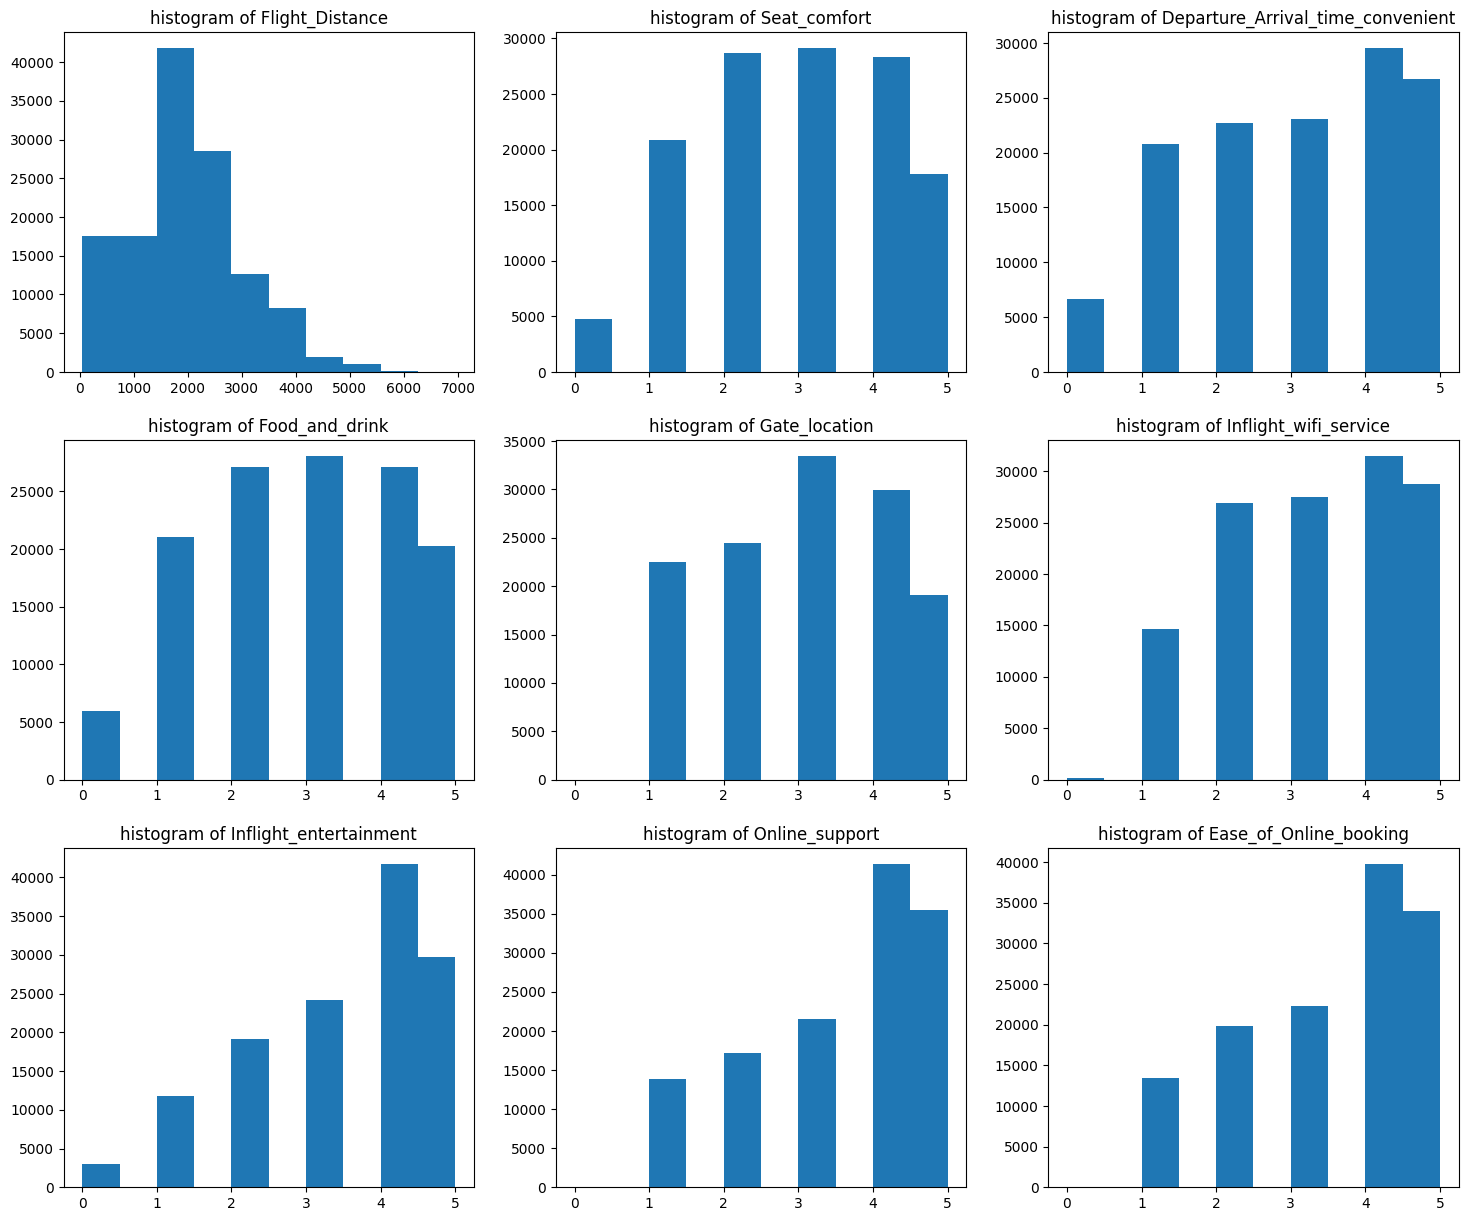

In [ ]:
plt.figure(figsize=(18,15))

# Histograms of the original data
plt.subplot(3, 3, 1)
plt.hist(airline_df["Flight_Distance"])
plt.title("histogram of Flight_Distance")

plt.subplot(3, 3, 2)
plt.hist(airline_df["Seat_comfort"])
plt.title("histogram of Seat_comfort")

plt.subplot(3, 3, 3)
plt.hist(airline_df["Departure_Arrival_time_convenient"])
plt.title("histogram of Departure_Arrival_time_convenient")

plt.subplot(3, 3, 4)
plt.hist(airline_df["Food_and_drink"])
plt.title("histogram of Food_and_drink")

plt.subplot(3, 3, 5)
plt.hist(airline_df["Gate_location"])
plt.title("histogram of Gate_location")

plt.subplot(3, 3, 6)
plt.hist(airline_df["Inflight_wifi_service"])
plt.title("histogram of Inflight_wifi_service")

plt.subplot(3, 3, 7)
plt.hist(airline_df["Inflight_entertainment"])
plt.title("histogram of Inflight_entertainment")

plt.subplot(3, 3, 8)
plt.hist(airline_df["Online_support"])
plt.title("histogram of Online_support")

plt.subplot(3, 3, 9)
plt.hist(airline_df["Ease_of_Online_booking"])
plt.title("histogram of Ease_of_Online_booking")

plt.show()

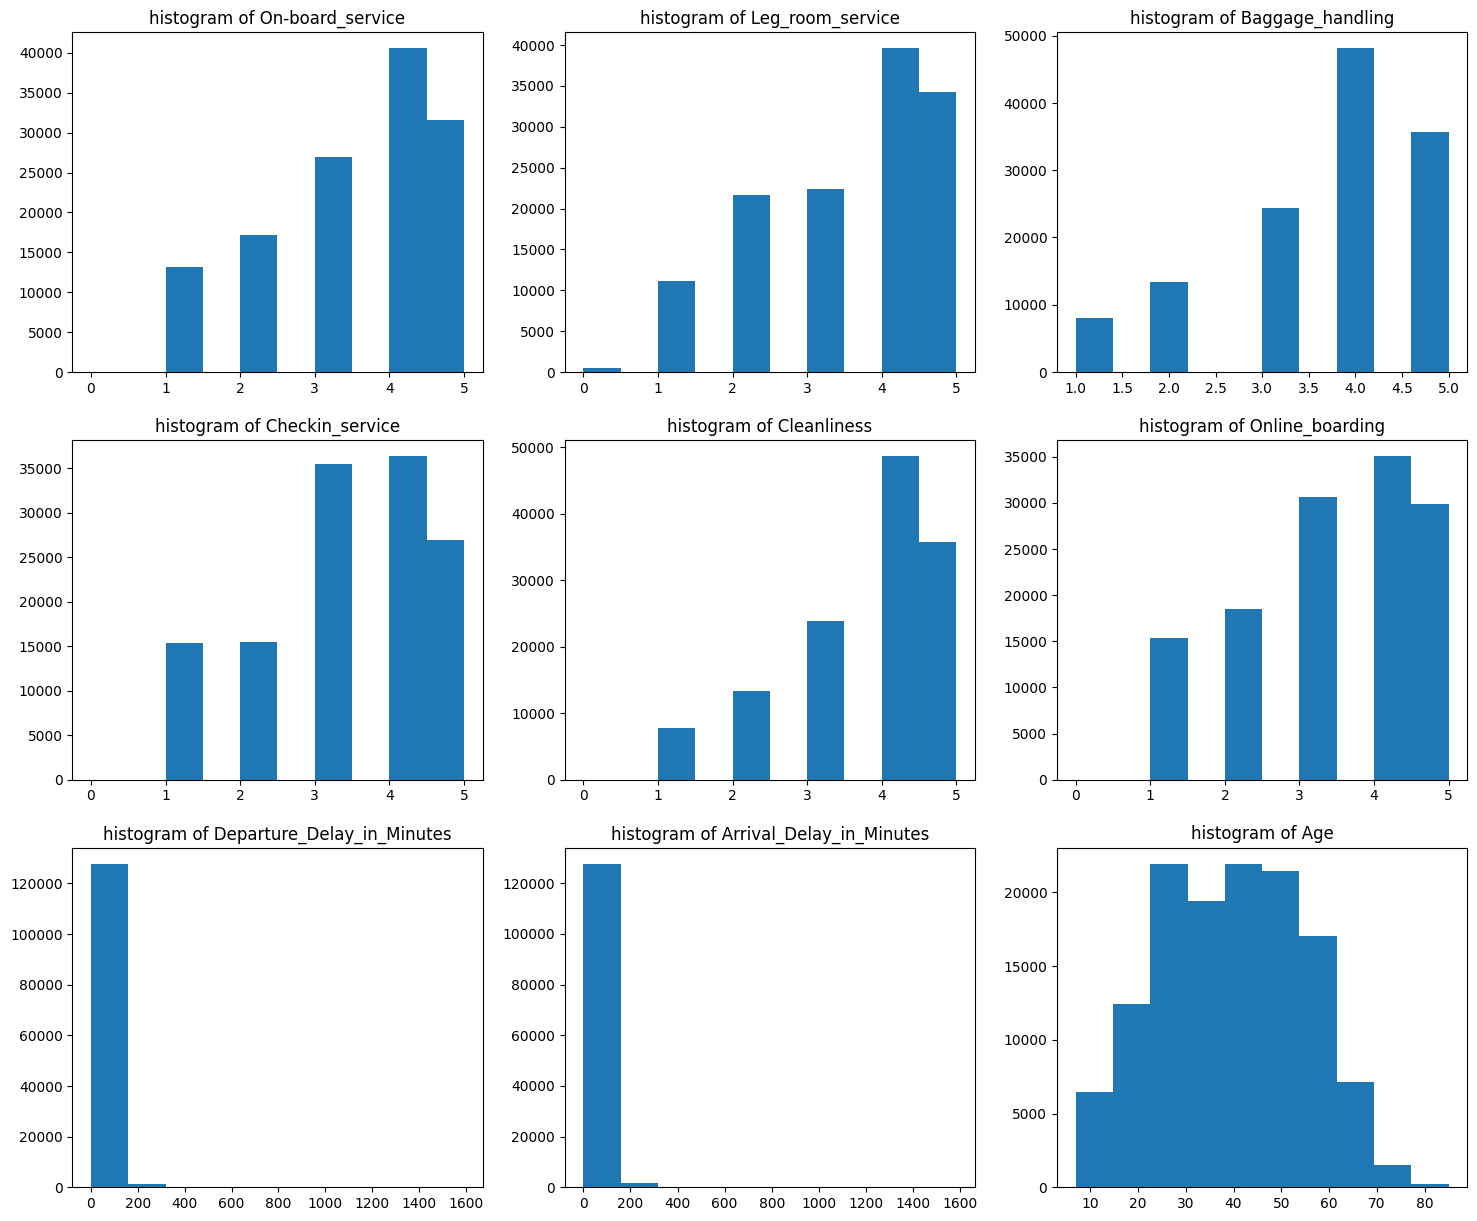

In [ ]:
plt.figure(figsize=(18,15))

# Histograms of the original data
plt.subplot(3, 3, 1)
plt.hist(airline_df["On-board_service"])
plt.title("histogram of On-board_service")

plt.subplot(3, 3, 2)
plt.hist(airline_df["Leg_room_service"])
plt.title("histogram of Leg_room_service")

plt.subplot(3, 3, 3)
plt.hist(airline_df["Baggage_handling"])
plt.title("histogram of Baggage_handling")

plt.subplot(3, 3, 4)
plt.hist(airline_df["Checkin_service"])
plt.title("histogram of Checkin_service")

plt.subplot(3, 3, 5)
plt.hist(airline_df["Cleanliness"])
plt.title("histogram of Cleanliness")

plt.subplot(3, 3, 6)
plt.hist(airline_df["Online_boarding"])
plt.title("histogram of Online_boarding")

plt.subplot(3, 3, 7)
plt.hist(airline_df["Departure_Delay_in_Minutes"])
plt.title("histogram of Departure_Delay_in_Minutes")

plt.subplot(3, 3, 8)
plt.hist(airline_df["Arrival_Delay_in_Minutes"])
plt.title("histogram of Arrival_Delay_in_Minutes")

plt.subplot(3, 3, 9)
plt.hist(airline_df["Age"])
plt.title("histogram of Age")

plt.show()

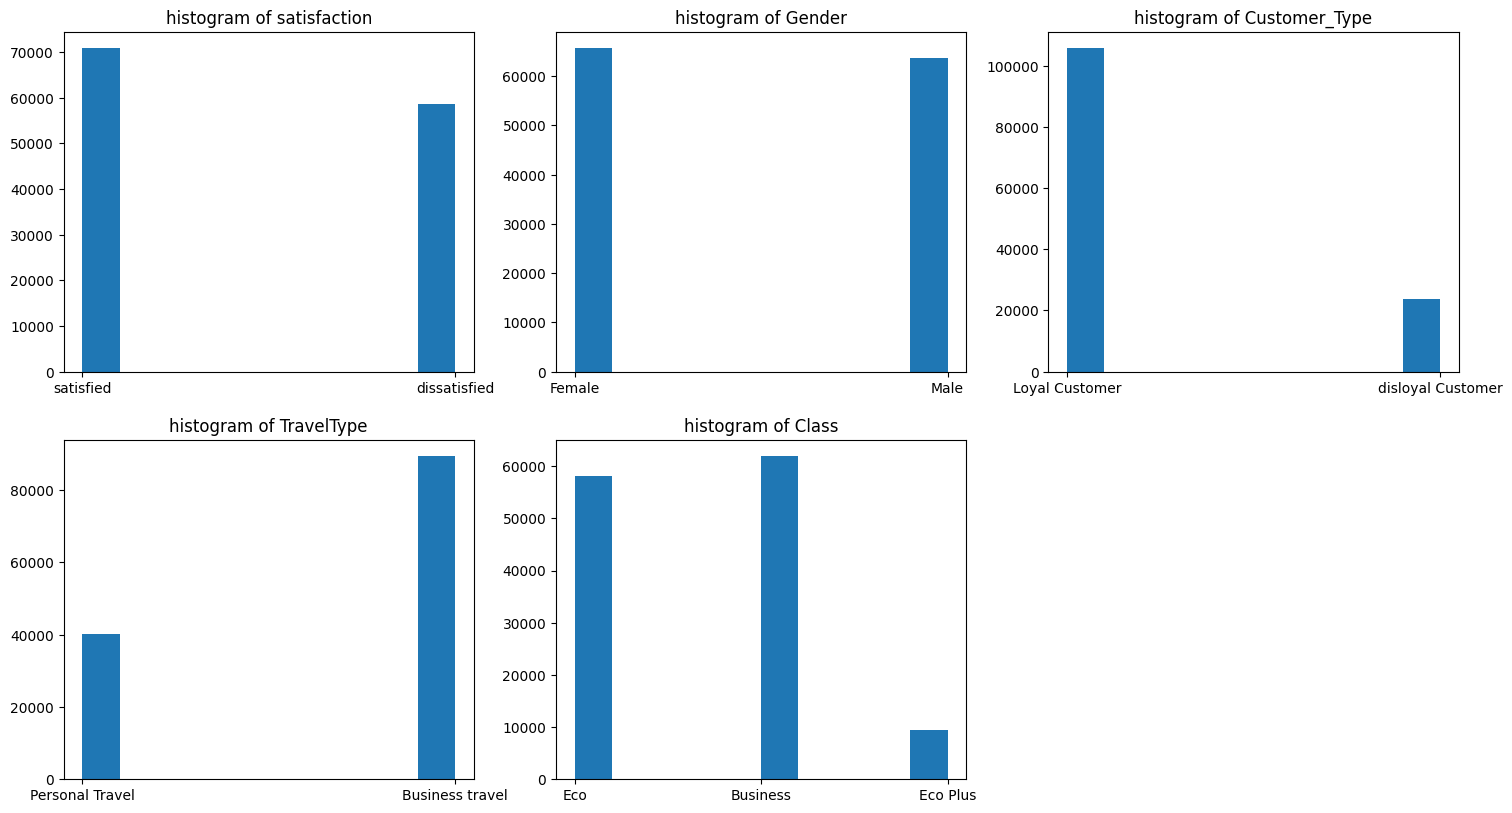

In [ ]:
plt.figure(figsize=(18,15))

# Histograms of the original data
plt.subplot(3, 3, 1)
plt.hist(airline_df["satisfaction"])
plt.title("histogram of satisfaction")

plt.subplot(3, 3, 2)
plt.hist(airline_df["Gender"])
plt.title("histogram of Gender")

plt.subplot(3, 3, 3)
plt.hist(airline_df["Customer_Type"])
plt.title("histogram of Customer_Type")

plt.subplot(3, 3, 4)
plt.hist(airline_df["TravelType"])
plt.title("histogram of TravelType")

plt.subplot(3, 3, 5)
plt.hist(airline_df["Class"])
plt.title("histogram of Class")

plt.show()

In [ ]:
# Descriptive statistics for just text-based variables
airline_df.describe(include=['O'])

,satisfaction,Gender,Customer_Type,TravelType,Class
count,129487,129487,129487,129487,129487
unique,2,2,2,2,3
top,satisfied,Female,Loyal Customer,Business travel,Business
freq,70882,65703,105773,89445,61990


In [ ]:
# Create crosstab of gender by race/ethnicity
count_table = pd.crosstab(airline_df["Gender"], airline_df["satisfaction"])
count_table

satisfaction,dissatisfied,satisfied
Gender,,
Female,22904,42799
Male,35701,28083


In [ ]:
# Create crosstab of gender by race/ethnicity
count_table = pd.crosstab(airline_df["Customer_Type"], airline_df["satisfaction"])
count_table

satisfaction,dissatisfied,satisfied
Customer_Type,,
Loyal Customer,40579,65194
disloyal Customer,18026,5688


In [ ]:
# Create crosstab of gender by race/ethnicity
count_table = pd.crosstab(airline_df["TravelType"], airline_df["satisfaction"])
count_table

satisfaction,dissatisfied,satisfied
TravelType,,
Business travel,37238,52207
Personal Travel,21367,18675


In [ ]:
# Create crosstab of gender by race/ethnicity
count_table = pd.crosstab(airline_df["Class"], airline_df["satisfaction"])
count_table

satisfaction,dissatisfied,satisfied
Class,,
Business,18013,43977
Eco,35219,22898
Eco Plus,5373,4007


In [ ]:
# Create crosstab of gender by race/ethnicity
count_table = pd.crosstab(airline_df["Gender"], airline_df["Customer_Type"])
count_table

Customer_Type,Loyal Customer,disloyal Customer
Gender,,
Female,52899,12804
Male,52874,10910


In [ ]:
# Create crosstab of gender by race/ethnicity
count_table = pd.crosstab(airline_df["Gender"], airline_df["TravelType"])
count_table

TravelType,Business travel,Personal Travel
Gender,,
Female,45661,20042
Male,43784,20000


In [ ]:
# Create crosstab of gender by race/ethnicity
count_table = pd.crosstab(airline_df["Gender"], airline_df["Class"])
count_table

Class,Business,Eco,Eco Plus
Gender,,,
Female,31179,29571,4953
Male,30811,28546,4427


In [ ]:
# Create crosstab of gender by race/ethnicity
count_table = pd.crosstab(airline_df["Customer_Type"], airline_df["TravelType"])
count_table

TravelType,Business travel,Personal Travel
Customer_Type,,
Loyal Customer,65930,39843
disloyal Customer,23515,199


In [ ]:
# Create crosstab of gender by race/ethnicity
count_table = pd.crosstab(airline_df["Customer_Type"], airline_df["Class"])
count_table

Class,Business,Eco,Eco Plus
Customer_Type,,,
Loyal Customer,52780,44525,8468
disloyal Customer,9210,13592,912


In [ ]:
# Create crosstab of gender by race/ethnicity
count_table = pd.crosstab(airline_df["TravelType"], airline_df["Class"])
count_table

Class,Business,Eco,Eco Plus
TravelType,,,
Business travel,59325,25231,4889
Personal Travel,2665,32886,4491


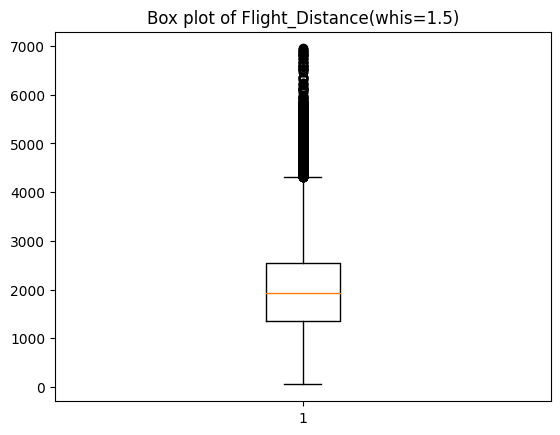

In [ ]:
plt.boxplot(airline_df["Flight_Distance"])
plt.title("Box plot of Flight_Distance(whis=1.5)")
plt.show()

In [ ]:
from scipy.stats.mstats import winsorize

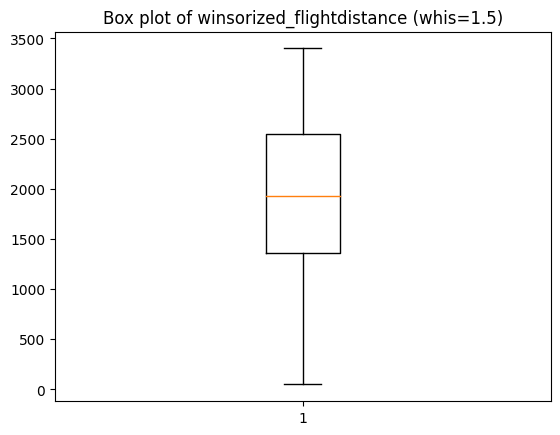

In [ ]:
winsorized_flightdistance = winsorize(airline_df["Flight_Distance"], (0, 0.10))
plt.boxplot(winsorized_flightdistance)
plt.title("Box plot of winsorized_flightdistance (whis=1.5)")
plt.show()
airline_df["winsorized_flightdistance"] = winsorized_flightdistance

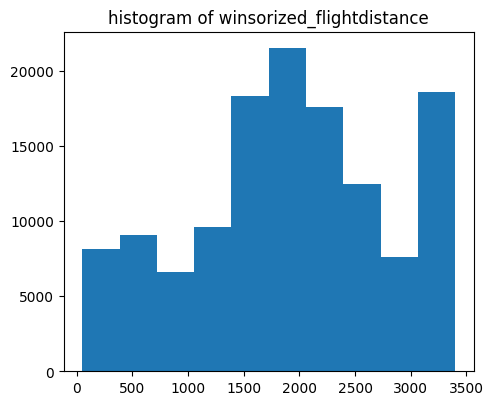

In [ ]:
plt.figure(figsize=(18,15))

# Histograms of the original data
plt.subplot(3, 3, 1)
plt.hist(airline_df["winsorized_flightdistance"])
plt.title("histogram of winsorized_flightdistance")

plt.show()

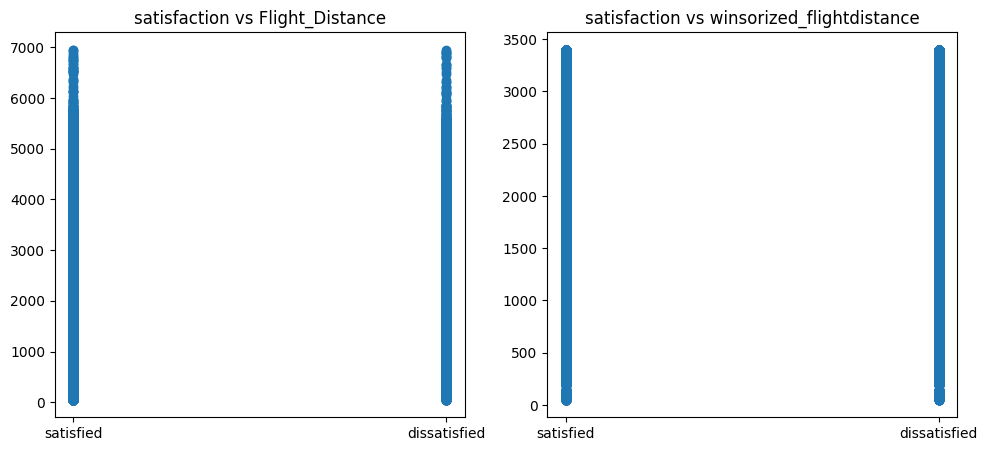

In [ ]:
plt.figure(figsize=(18,5))
plt.subplot(1,3,1)
plt.scatter(airline_df["satisfaction"], airline_df["Flight_Distance"])
plt.title("satisfaction vs Flight_Distance")

plt.subplot(1,3,2)
plt.scatter(airline_df["satisfaction"], airline_df["winsorized_flightdistance"])
plt.title("satisfaction vs winsorized_flightdistance")


plt.show()

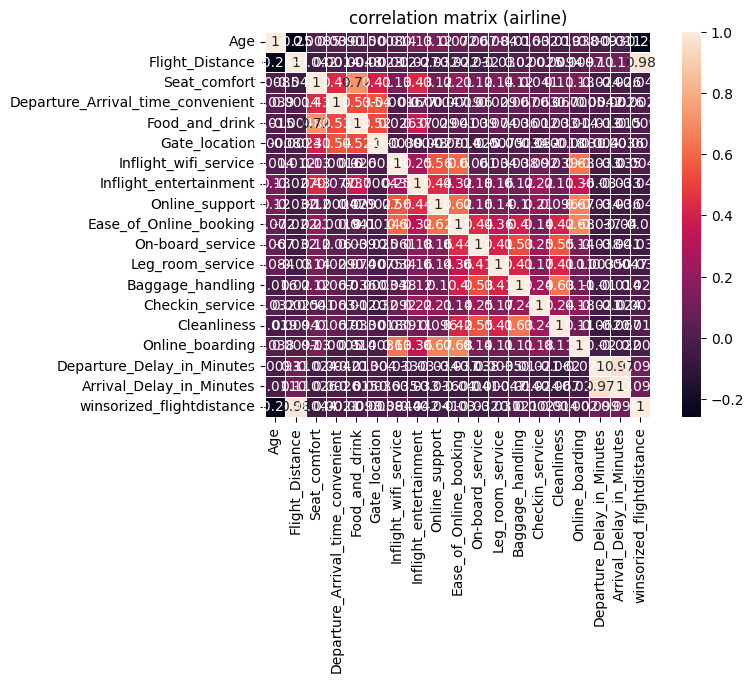

In [ ]:
import seaborn as sns
# Make the correlation matrices
corrmat_airline = airline_df.corr()


# Heat maps are a great way to get
# a quick visual read on a big correlation matrix.

plt.figure(figsize=(18,5))

plt.subplot(1,2,1)
# Draw the heat map using seaborn
sns.heatmap(corrmat_airline, square=True, annot=True, linewidths=.5)
plt.title("correlation matrix (airline)")


plt.show()

# Try to match the correlation numbers
# to the scatter plots above to get a
# sense of what each magnitude of
# correlation can look like.


In [ ]:
airline_df_encode = pd.get_dummies(airline_df, columns = ['TravelType', 'satisfaction', 'Gender', 'Customer_Type', 'Class'])

In [ ]:
encode_airline_df = pd.get_dummies(airline_df, columns = ['TravelType', 'Gender', 'Customer_Type', 'Class'])

# Encode the target column
encode_airline_df.loc[airline_df['satisfaction'] == 'satisfied', 'satisfaction'] = 1
encode_airline_df.loc[airline_df['satisfaction'] == 'dissatisfied', 'satisfaction'] = 0


In [ ]:
airline_df_encode.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129487 entries, 0 to 129879
Data columns (total 30 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Age                                129487 non-null  int64  
 1   Flight_Distance                    129487 non-null  int64  
 2   Seat_comfort                       129487 non-null  int64  
 3   Departure_Arrival_time_convenient  129487 non-null  int64  
 4   Food_and_drink                     129487 non-null  int64  
 5   Gate_location                      129487 non-null  int64  
 6   Inflight_wifi_service              129487 non-null  int64  
 7   Inflight_entertainment             129487 non-null  int64  
 8   Online_support                     129487 non-null  int64  
 9   Ease_of_Online_booking             129487 non-null  int64  
 10  On-board_service                   129487 non-null  int64  
 11  Leg_room_service                   1294

In [ ]:
encode_airline_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129487 entries, 0 to 129879
Data columns (total 29 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129487 non-null  object 
 1   Age                                129487 non-null  int64  
 2   Flight_Distance                    129487 non-null  int64  
 3   Seat_comfort                       129487 non-null  int64  
 4   Departure_Arrival_time_convenient  129487 non-null  int64  
 5   Food_and_drink                     129487 non-null  int64  
 6   Gate_location                      129487 non-null  int64  
 7   Inflight_wifi_service              129487 non-null  int64  
 8   Inflight_entertainment             129487 non-null  int64  
 9   Online_support                     129487 non-null  int64  
 10  Ease_of_Online_booking             129487 non-null  int64  
 11  On-board_service                   1294

In [ ]:
airline_df_encode.head()

,Age,Flight_Distance,Seat_comfort,Departure_Arrival_time_convenient,Food_and_drink,Gate_location,Inflight_wifi_service,Inflight_entertainment,Online_support,Ease_of_Online_booking,...,TravelType_Personal Travel,satisfaction_dissatisfied,satisfaction_satisfied,Gender_Female,Gender_Male,Customer_Type_Loyal Customer,Customer_Type_disloyal Customer,Class_Business,Class_Eco,Class_Eco Plus
0,65,265,0,0,0,2,2,4,2,3,...,1,0,1,1,0,1,0,0,1,0
1,47,2464,0,0,0,3,0,2,2,3,...,1,0,1,0,1,1,0,1,0,0
2,15,2138,0,0,0,3,2,0,2,2,...,1,0,1,1,0,1,0,0,1,0
3,60,623,0,0,0,3,3,4,3,1,...,1,0,1,1,0,1,0,0,1,0
4,70,354,0,0,0,3,4,3,4,2,...,1,0,1,1,0,1,0,0,1,0


In [ ]:
encode_airline_df.head()

,satisfaction,Age,Flight_Distance,Seat_comfort,Departure_Arrival_time_convenient,Food_and_drink,Gate_location,Inflight_wifi_service,Inflight_entertainment,Online_support,...,winsorized_flightdistance,TravelType_Business travel,TravelType_Personal Travel,Gender_Female,Gender_Male,Customer_Type_Loyal Customer,Customer_Type_disloyal Customer,Class_Business,Class_Eco,Class_Eco Plus
0,1,65,265,0,0,0,2,2,4,2,...,265,0,1,1,0,1,0,0,1,0
1,1,47,2464,0,0,0,3,0,2,2,...,2464,0,1,0,1,1,0,1,0,0
2,1,15,2138,0,0,0,3,2,0,2,...,2138,0,1,1,0,1,0,0,1,0
3,1,60,623,0,0,0,3,3,4,3,...,623,0,1,1,0,1,0,0,1,0
4,1,70,354,0,0,0,3,4,3,4,...,354,0,1,1,0,1,0,0,1,0


In [ ]:
#y = airline_df_encode['satisfaction_satisfied']
#X = airline_df_encode.drop(['satisfaction_satisfied'], axis =1)

#y.shape, X.shape

In [ ]:
y = encode_airline_df['satisfaction']
X = encode_airline_df.drop(['satisfaction'], axis =1)

y.shape, X.shape

((129487,), (129487, 28))

In [ ]:
X.dtypes

Age                                    int64
Flight_Distance                        int64
Seat_comfort                           int64
Departure_Arrival_time_convenient      int64
Food_and_drink                         int64
Gate_location                          int64
Inflight_wifi_service                  int64
Inflight_entertainment                 int64
Online_support                         int64
Ease_of_Online_booking                 int64
On-board_service                       int64
Leg_room_service                       int64
Baggage_handling                       int64
Checkin_service                        int64
Cleanliness                            int64
Online_boarding                        int64
Departure_Delay_in_Minutes             int64
Arrival_Delay_in_Minutes             float64
winsorized_flightdistance              int64
TravelType_Business travel             uint8
TravelType_Personal Travel             uint8
Gender_Female                          uint8
Gender_Mal

In [ ]:
y.dtypes

dtype('O')

In [ ]:
y = y.astype('int')

In [ ]:
encode_airline_df.satisfaction.value_counts()

1    70882
0    58605
Name: satisfaction, dtype: int64

In [ ]:
encode_airline_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129487 entries, 0 to 129879
Data columns (total 29 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129487 non-null  object 
 1   Age                                129487 non-null  int64  
 2   Flight_Distance                    129487 non-null  int64  
 3   Seat_comfort                       129487 non-null  int64  
 4   Departure_Arrival_time_convenient  129487 non-null  int64  
 5   Food_and_drink                     129487 non-null  int64  
 6   Gate_location                      129487 non-null  int64  
 7   Inflight_wifi_service              129487 non-null  int64  
 8   Inflight_entertainment             129487 non-null  int64  
 9   Online_support                     129487 non-null  int64  
 10  Ease_of_Online_booking             129487 non-null  int64  
 11  On-board_service                   1294

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
y = y.astype('int')

In [ ]:
#Logistic Regression
lr = LogisticRegression(solver='lbfgs', max_iter=1000)
lr.fit(X_train, y_train)

lr_score = lr.score(X_test, y_test)
lr_predictions = lr.predict(X_test)

print('Accuracy of Logistic Regression: {:.3f}'.format(lr_score))

Accuracy of Logistic Regression: 0.827


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2)
lr = LogisticRegression(solver='lbfgs', max_iter=10000, penalty='l2', C=0.6, random_state=2)
lr.fit(X_train, y_train)

test_score = lr.score(X_test, y_test)
train_score = lr.score(X_train, y_train)

print('Score on training data: ', train_score)
print('Score on test data: ', test_score)

Score on training data:  0.8370385625289605
Score on test data:  0.8341159026319042


In [ ]:
# All imports in one place for convenience
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_20newsgroups_vectorized
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.dummy import DummyClassifier
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, fbeta_score, classification_report
from sklearn.metrics import roc_curve, precision_recall_curve, roc_auc_score
%matplotlib inline

predictions = lr.predict(X_test)

confusion = confusion_matrix(y_test, lr_predictions, labels=[1, 0])
print(confusion)

# If this is errored out, run logisticregression without penalty and come back and execute this

[[15248  2470]
 [ 3145 11509]]


In [ ]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    Given a scikit-learn confusion matrix (CM), make a nice plot.

    Arguments
    ---------
    cm:           Confusion matrix from sklearn.metrics.confusion_matrix

    target_names: Given classification classes, such as [0, 1, 2]
                  The class names, for example, ['high', 'medium', 'low']

    title:        The text to display at the top of the matrix

    cmap:         The gradient of the values displayed from matplotlib.pyplot.cm
                  See http://matplotlib.org/examples/color/colormaps_reference.html
                  `plt.get_cmap('jet')` or `plt.cm.Blues`

    normalize:    If `False`, plot the raw numbers
                  If `True`, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # Confusion matrix created by
                                                              # `sklearn.metrics.confusion_matrix`
                          normalize    = True,                # Show proportions
                          target_names = y_labels_vals,       # List of names of the classes
                          title        = best_estimator_name) # Title of graph

    Citation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

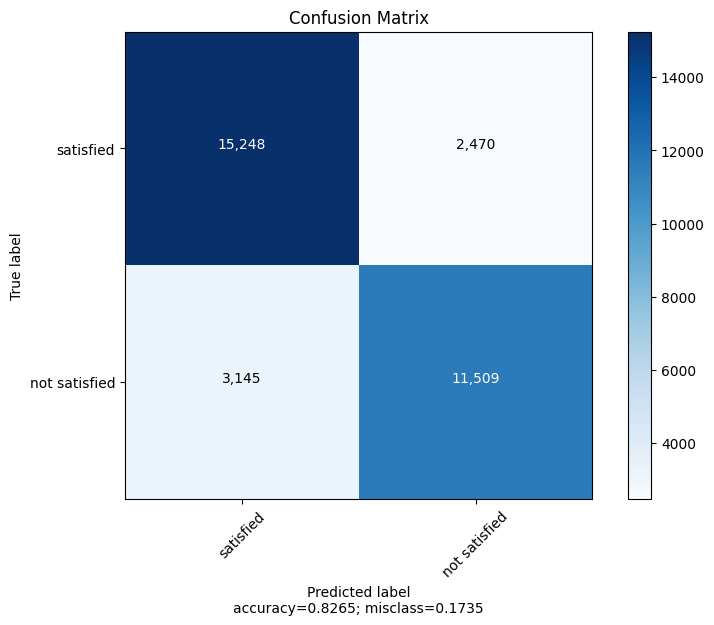

In [ ]:
plot_confusion_matrix(cm=confusion, target_names = ['satisfied', 'not satisfied'], title = 'Confusion Matrix',normalize=False)


In [ ]:
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
fbeta_precision = fbeta_score(y_test, predictions, beta=0.5)
fbeta_recall = fbeta_score(y_test, predictions, beta=2)

print('Accuracy score: {:.2f}'.format(accuracy))
print('Precision score: {:.2f}'.format(precision))
print('Recall score: {:.2f}'.format(recall))
print('F1 score: {:.2f}'.format(f1))
print('Fbeta score favoring precision: {:.2f}'.format(fbeta_precision))
print('FBeta score favoring recall: {:.2f}'.format(fbeta_recall))

Accuracy score: 0.83
Precision score: 0.83
Recall score: 0.86
F1 score: 0.84
Fbeta score favoring precision: 0.84
FBeta score favoring recall: 0.85


In [ ]:
report = classification_report(y_test, predictions, target_names=['Not Satisfied', 'Satisfied'])
print(report)

               precision    recall  f1-score   support

Not Satisfied       0.82      0.79      0.80     14654
    Satisfied       0.83      0.86      0.84     17718

     accuracy                           0.83     32372
    macro avg       0.83      0.82      0.82     32372
 weighted avg       0.83      0.83      0.83     32372



In [ ]:
dummy = DummyClassifier(strategy = 'most_frequent')
dummy.fit(X_train, y_train)
dummy.score(X_test, y_test)
dummy_report = classification_report(y_test, dummy.predict(X_test), target_names=['Not Satisfied', 'Satisfied'])
print(dummy_report)

               precision    recall  f1-score   support

Not Satisfied       0.00      0.00      0.00     14654
    Satisfied       0.55      1.00      0.71     17718

     accuracy                           0.55     32372
    macro avg       0.27      0.50      0.35     32372
 weighted avg       0.30      0.55      0.39     32372



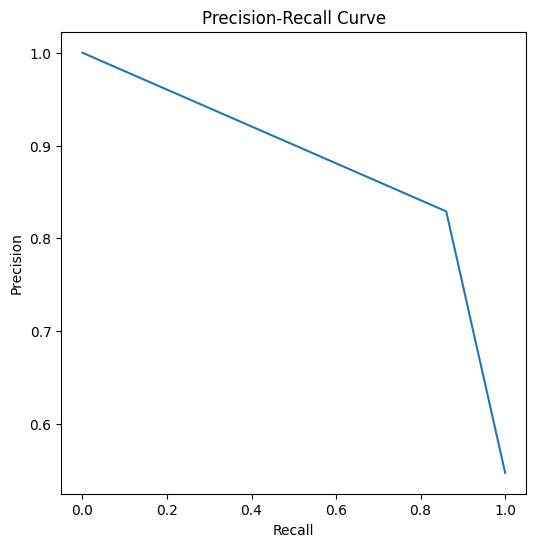

In [ ]:
pres, rec, thresholds = precision_recall_curve(y_test, predictions)
fig = plt.figure(figsize = (6, 6))
plt.plot(rec, pres)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

In [ ]:
probs = lr.predict_proba(X_test)[:, 1]
print(probs[1:30])

[0.57076383 0.9092665  0.81073938 0.81347504 0.07867064 0.80773693
 0.13669449 0.94728295 0.95605158 0.10380221 0.79625447 0.77053332
 0.11307142 0.01730985 0.83973883 0.96226783 0.85839379 0.02268057
 0.85214404 0.99042707 0.93860822 0.76696509 0.12231564 0.38724585
 0.5258619  0.62049404 0.05550091 0.03425899 0.81247483]


In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, probs)
print(fpr[1:30])
print(tpr[1:30])
print(thresholds[1:30])

[0.00000000e+00 0.00000000e+00 6.82407534e-05 6.82407534e-05
 1.36481507e-04 1.36481507e-04 2.04722260e-04 2.04722260e-04
 2.72963014e-04 2.72963014e-04 3.41203767e-04 3.41203767e-04
 4.09444520e-04 4.09444520e-04 4.77685274e-04 4.77685274e-04
 5.45926027e-04 5.45926027e-04 6.14166780e-04 6.14166780e-04
 6.82407534e-04 6.82407534e-04 8.18889041e-04 8.18889041e-04
 8.87129794e-04 8.87129794e-04 9.55370547e-04 9.55370547e-04
 1.02361130e-03]
[5.64397788e-05 1.26425104e-02 1.26425104e-02 1.78349701e-02
 1.78349701e-02 1.91895248e-02 1.91895248e-02 2.30838695e-02
 2.30838695e-02 4.27249125e-02 4.27249125e-02 4.38537081e-02
 4.38537081e-02 4.65063777e-02 4.65063777e-02 4.69578959e-02
 4.69578959e-02 4.87075291e-02 4.87075291e-02 5.47465854e-02
 5.47465854e-02 5.48030252e-02 5.48030252e-02 5.51981036e-02
 5.51981036e-02 5.64397788e-02 5.64397788e-02 5.99954848e-02
 5.99954848e-02]
[0.99804331 0.98838005 0.98837816 0.98655164 0.98653212 0.98626848
 0.98624376 0.98533472 0.98533423 0.98075825 

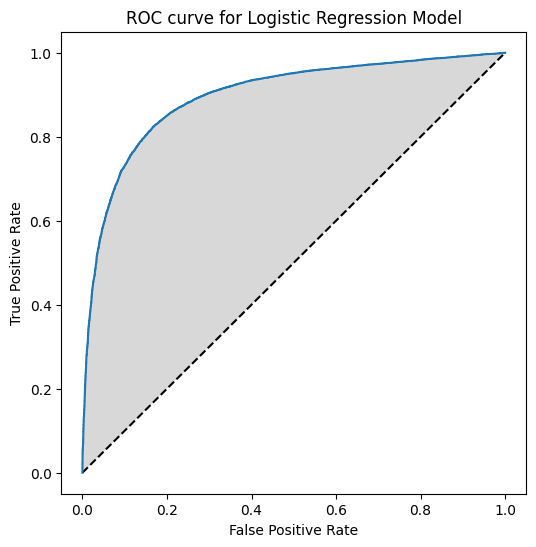

In [ ]:
fig = plt.figure(figsize = (6, 6))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.fill(fpr, tpr, 'grey', alpha=0.3)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for Logistic Regression Model')
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

lr = LogisticRegression(solver='lbfgs')
lr.fit(X_train, y_train)
print('First split score: {:.3f}'.format(lr.score(X_test, y_test)))

X_train, X_test, y_train, y_test = train_test_split(X, y)

lr = LogisticRegression(solver='lbfgs')
lr.fit(X_train, y_train)
print('Second split score: {:.3f}'.format(lr.score(X_test, y_test)))

First split score: 0.755
Second split score: 0.701


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=40)

lr = LogisticRegression(solver='lbfgs')
lr.fit(X_train, y_train)
print('First split score: {:.3f}'.format(lr.score(X_test, y_test)))

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=40)

lr = LogisticRegression(solver='lbfgs')
lr.fit(X_train, y_train)
print('Second split score: {:.3f}'.format(lr.score(X_test, y_test)))

First split score: 0.755
Second split score: 0.755


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=40)
clf = LogisticRegression(solver='lbfgs')
cv_scores = cross_val_score(clf, X_train, y_train, cv = 5)

print('Accuracy scores for the five folds: ', cv_scores)
print('Mean cross-validation score: {:.3f}'.format(np.mean(cv_scores)))

Accuracy scores for the five folds:  [0.75014158 0.74803069 0.75529012 0.75158317 0.74741286]
Mean cross-validation score: 0.750


In [ ]:
# Support-vector machines
svm = LinearSVC(max_iter=1000)
svm.fit(X_train, y_train)
svm_score = svm.score(X_test, y_test)
svm_predictions = svm.predict(X_test)

print('Accuracy of SVM: {:.3f}'.format(svm_score))

Accuracy of SVM: 0.650


In [ ]:
#KNeighbors Classifier


knn = KNeighborsClassifier(n_neighbors=7)

# Then fit the model
knn.fit(X_train, y_train)

# How well did it do?
knn_7_score = knn.score(X_test, y_test)
knn_7_predictions = knn.predict(X_test)

print('Accuracy of KNN (k = 7): {:.3f}'.format(knn_7_score))

Accuracy of KNN (k = 7): 0.692


In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)

# Then fit the model
knn.fit(X_train, y_train)

# How well did it do?
knn_5_score = knn.score(X_test, y_test)
knn_5_predictions = knn.predict(X_test)

print('Accuracy of KNN (k = 5): {:.3f}'.format(knn_5_score))

Accuracy of KNN (k = 5): 0.690


In [ ]:

dt = DecisionTreeClassifier()

dt.fit(X_train,y_train)

dt_score = dt.score(X_test, y_test)
dt_predictions = dt.predict(X_test)
print('Accuracy of Decision Tree: {:.3f} '.format(dt_score))


Accuracy of Decision Tree: 0.939 


In [ ]:
rf = RandomForestClassifier(n_estimators = 22, random_state = 40)

rf.fit(X_train,y_train)

rf_score = rf.score(X_test, y_test)
rf_predictions = rf.predict(X_test)

print('Accuracy of Random Forest: {:.3f}'.format(rf_score))


Accuracy of Random Forest: 0.957


In [ ]:
predictions_dictionary = {'Logistic Regression' : lr_predictions, 'KNN_7' : knn_7_predictions,
                          'KNN_5': knn_5_predictions, 'SVM' : svm_predictions, 'Decision Tree' : dt_predictions,
                          'Random Forest' : rf_predictions, 'Actual': y_test}

predictions_df = pd.DataFrame(predictions_dictionary)
predictions_df

,Logistic Regression,KNN_7,KNN_5,SVM,Decision Tree,Random Forest,Actual
44740,1,1,1,1,0,0,0
6417,1,1,1,1,1,1,1
27100,1,1,1,1,1,1,1
46988,1,0,0,1,0,0,0
65136,1,0,0,1,1,1,1
...,...,...,...,...,...,...,...
19116,1,0,0,1,0,0,0
29283,1,0,0,1,0,0,0
32708,1,0,0,1,0,0,0
11721,1,1,1,1,1,1,1


**Looking at the above table and the accuracy value shown above, I find Random Forest is the best model. The next best is decision Tree.**

In [ ]:
encode_airline_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129487 entries, 0 to 129879
Data columns (total 29 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129487 non-null  object 
 1   Age                                129487 non-null  int64  
 2   Flight_Distance                    129487 non-null  int64  
 3   Seat_comfort                       129487 non-null  int64  
 4   Departure_Arrival_time_convenient  129487 non-null  int64  
 5   Food_and_drink                     129487 non-null  int64  
 6   Gate_location                      129487 non-null  int64  
 7   Inflight_wifi_service              129487 non-null  int64  
 8   Inflight_entertainment             129487 non-null  int64  
 9   Online_support                     129487 non-null  int64  
 10  Ease_of_Online_booking             129487 non-null  int64  
 11  On-board_service                   1294

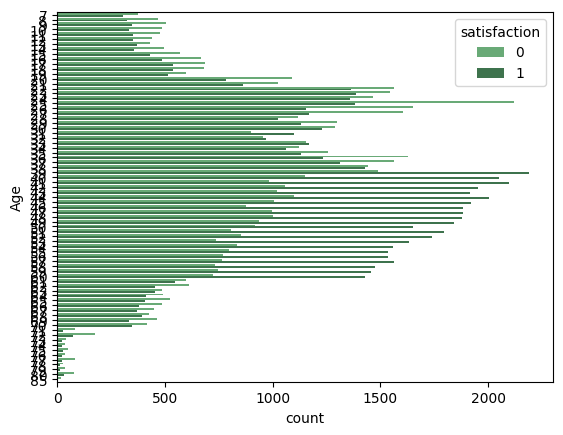

In [ ]:
# Plot counts for each combination of levels.
sns.countplot(y="Age", hue="satisfaction", data=encode_airline_df, palette="Greens_d")
plt.show()



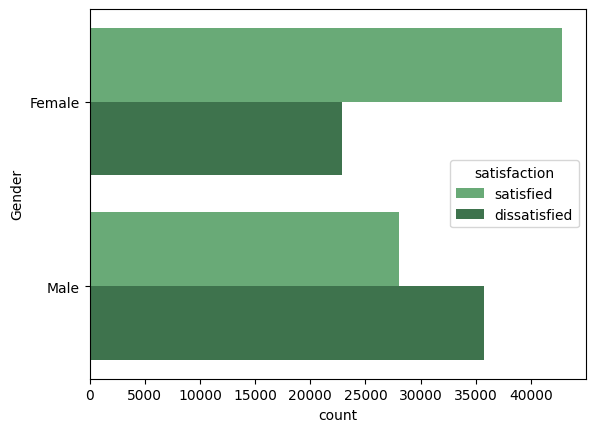

In [ ]:
# Plot counts for each combination of levels.
sns.countplot(y="Gender", hue="satisfaction", data=airline_df, palette="Greens_d")
plt.show()


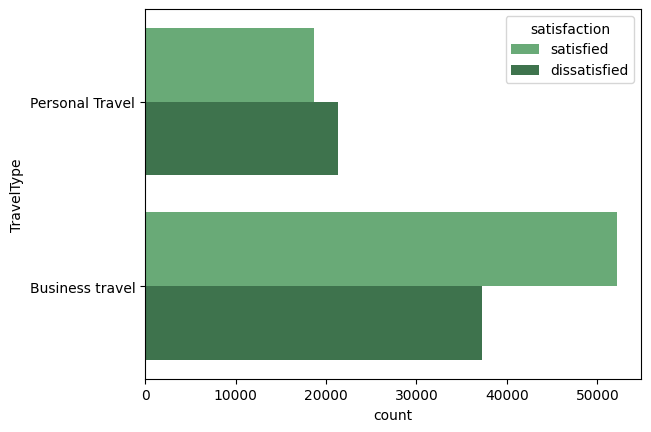

In [ ]:
# Plot counts for each combination of levels.
sns.countplot(y="TravelType", hue="satisfaction", data=airline_df, palette="Greens_d")
plt.show()


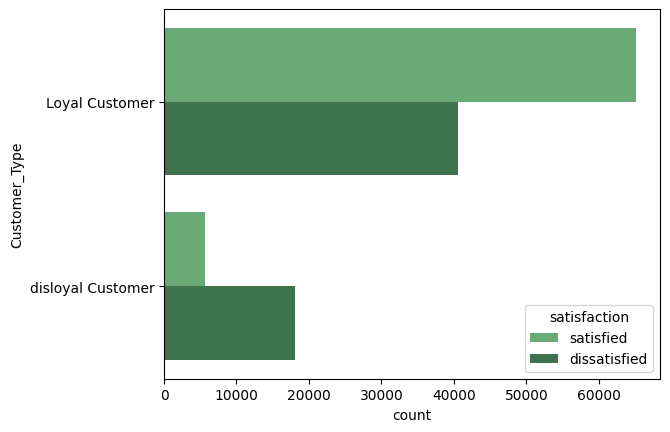

In [ ]:
# Plot counts for each combination of levels.
sns.countplot(y="Customer_Type", hue="satisfaction", data=airline_df, palette="Greens_d")
plt.show()


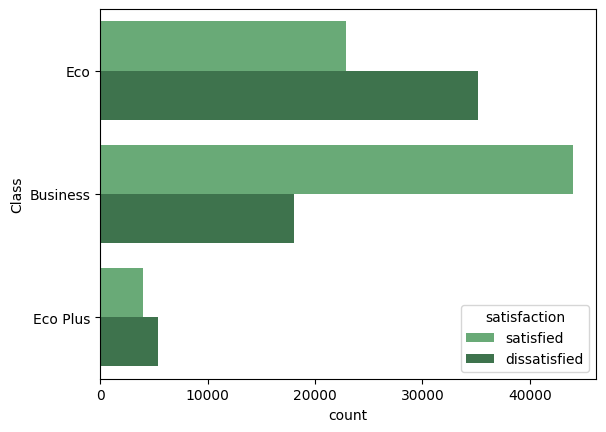

In [ ]:
# Plot counts for each combination of levels.
sns.countplot(y="Class", hue="satisfaction", data=airline_df, palette="Greens_d")
plt.show()


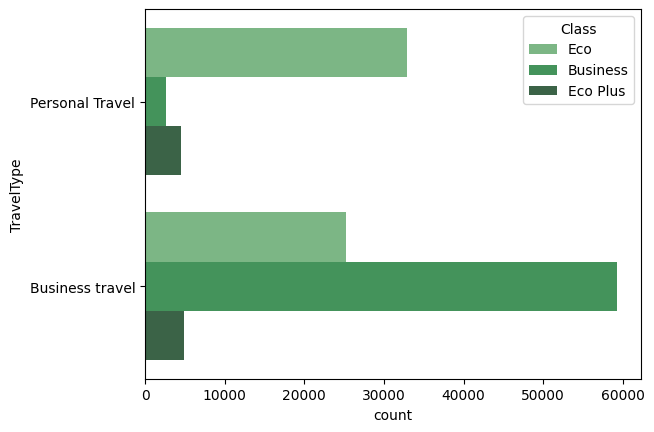

In [ ]:
# Plot counts for each combination of levels.
sns.countplot(y="TravelType", hue="Class", data=airline_df, palette="Greens_d")
plt.show()


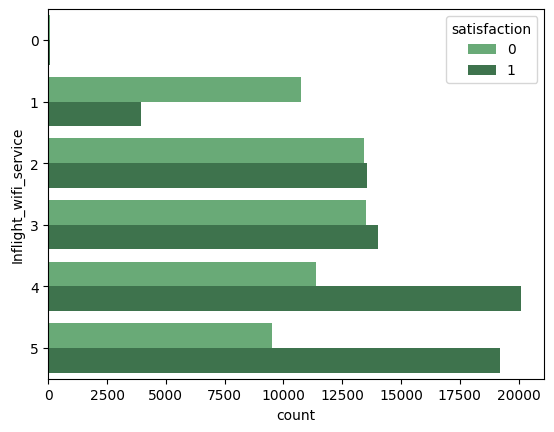

In [ ]:
# Plot counts for each combination of levels.
sns.countplot(y="Inflight_wifi_service", hue="satisfaction", data=encode_airline_df, palette="Greens_d")
plt.show()


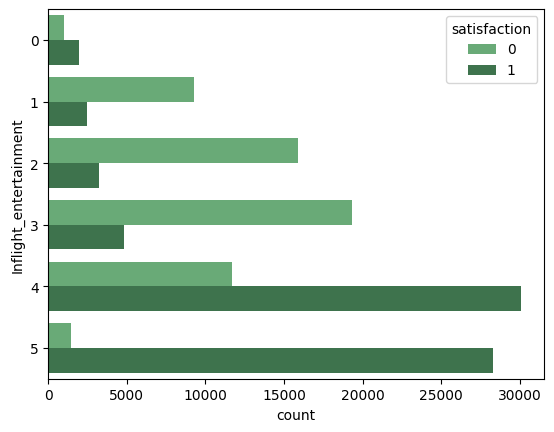

In [ ]:
# Plot counts for each combination of levels.
sns.countplot(y="Inflight_entertainment", hue="satisfaction", data=encode_airline_df, palette="Greens_d")
plt.show()


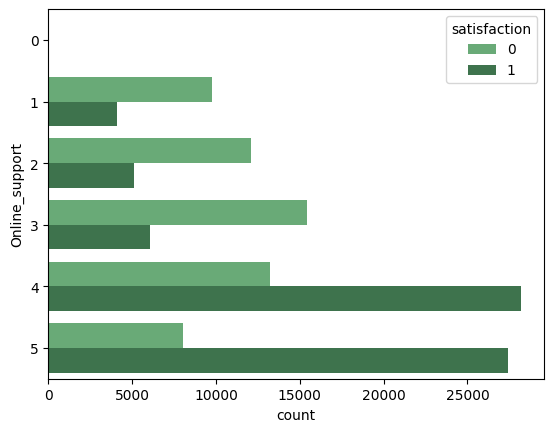

In [ ]:
# Plot counts for each combination of levels.
sns.countplot(y="Online_support", hue="satisfaction", data=encode_airline_df, palette="Greens_d")
plt.show()

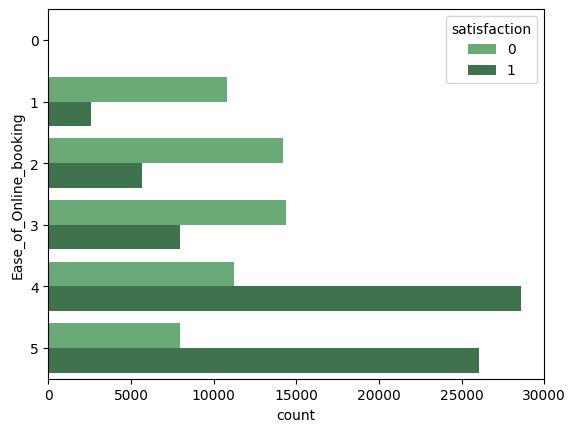

In [ ]:
# Plot counts for each combination of levels.
sns.countplot(y="Ease_of_Online_booking", hue="satisfaction", data=encode_airline_df, palette="Greens_d")
plt.show()

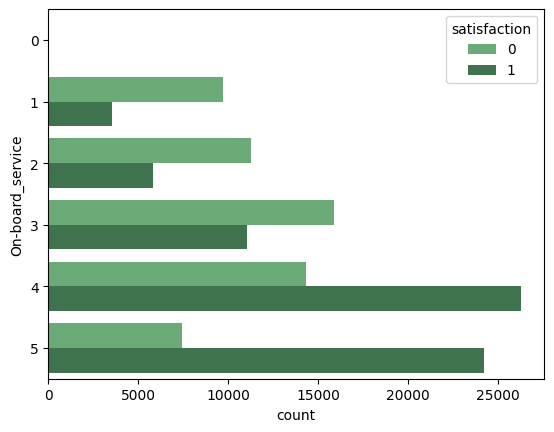

In [ ]:
# Plot counts for each combination of levels.
sns.countplot(y="On-board_service", hue="satisfaction", data=encode_airline_df, palette="Greens_d")
plt.show()

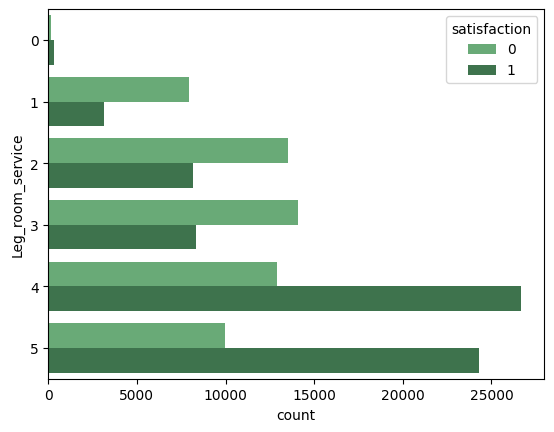

In [ ]:
# Plot counts for each combination of levels.
sns.countplot(y="Leg_room_service", hue="satisfaction", data=encode_airline_df, palette="Greens_d")
plt.show()

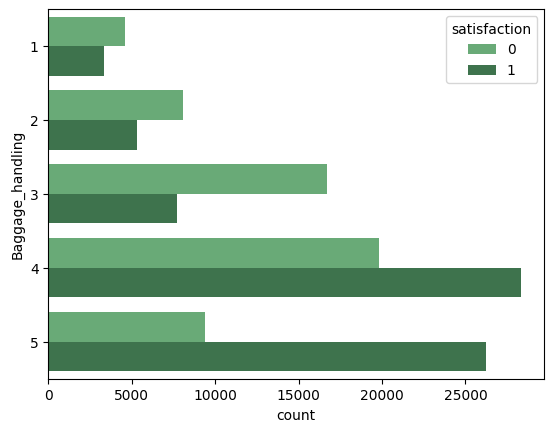

In [ ]:
# Plot counts for each combination of levels.
sns.countplot(y="Baggage_handling", hue="satisfaction", data=encode_airline_df, palette="Greens_d")
plt.show()

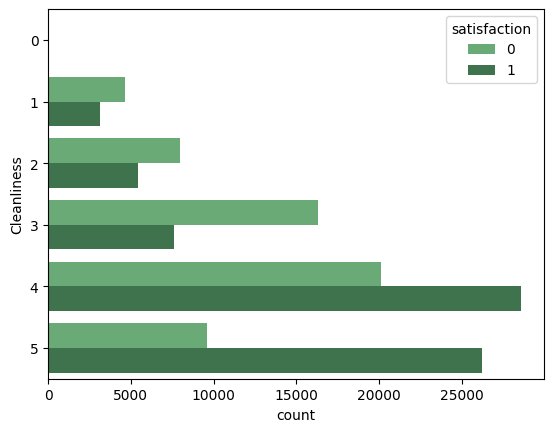

In [ ]:
# Plot counts for each combination of levels.
sns.countplot(y="Cleanliness", hue="satisfaction", data=encode_airline_df, palette="Greens_d")
plt.show()

In [ ]:
feature_names=['Arrival_Delay_in_Minutes', 'Departure_Delay_in_Minutes']
target_name=['satisfaction']

# Select 50 samples and two features (for simplicity)
data_df = pd.DataFrame(encode_airline_df, columns=feature_names)
data_df = data_df[['Arrival_Delay_in_Minutes', 'Departure_Delay_in_Minutes']]
target_df = pd.DataFrame(encode_airline_df, columns=target_name)
target_df.columns = ['satisfaction']

# Get the min and max on the x-axis for plotting lines later
minX = data_df['Arrival_Delay_in_Minutes'].min()
maxX = data_df['Arrival_Delay_in_Minutes'].max()

print(data_df.head())
print(target_df.head())




   Arrival_Delay_in_Minutes  Departure_Delay_in_Minutes
0                       0.0                           0
1                     305.0                         310
2                       0.0                           0
3                       0.0                           0
4                       0.0                           0
  satisfaction
0            1
1            1
2            1
3            1
4            1


In [ ]:
target_df = target_df.astype('int')

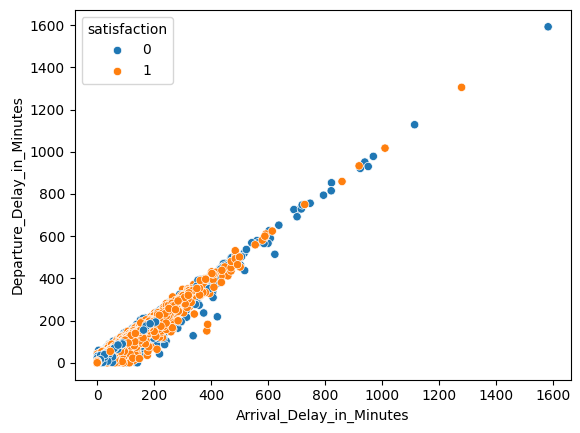

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x = 'Arrival_Delay_in_Minutes', y = 'Departure_Delay_in_Minutes', data = data_df, hue=target_df['satisfaction'])
plt.show()

In [ ]:
def drawLine(plt, m, c, min, max):
  x = np.linspace(min, max)
  y = m * x + c
  plt.plot(x, y, 'g-')

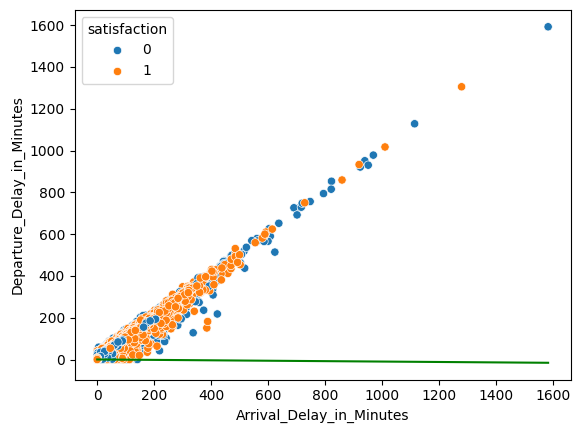

In [ ]:
sns.scatterplot(x = 'Arrival_Delay_in_Minutes', y = 'Departure_Delay_in_Minutes', data = data_df, hue=target_df['satisfaction'])
# Draw a line at some arbitrary place
drawLine(plt, -0.01, 0.3, minX, maxX)
plt.show()

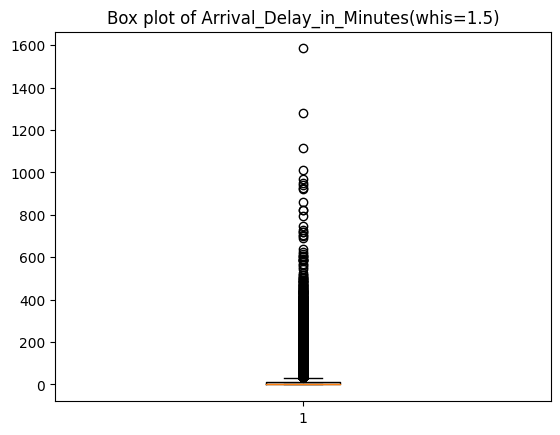

In [ ]:
plt.boxplot(encode_airline_df["Arrival_Delay_in_Minutes"])
plt.title("Box plot of Arrival_Delay_in_Minutes(whis=1.5)")
plt.show()


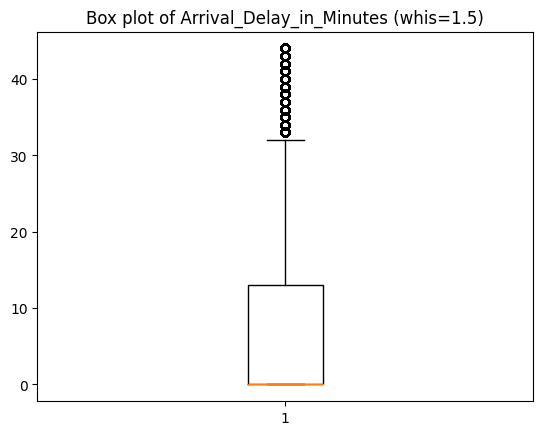

In [ ]:

from scipy.stats.mstats import winsorize

winsorized_Arrival_Delay_in_Minutes = winsorize(encode_airline_df["Arrival_Delay_in_Minutes"], (0, 0.10))
plt.boxplot(winsorized_Arrival_Delay_in_Minutes)
plt.title("Box plot of Arrival_Delay_in_Minutes (whis=1.5)")
plt.show()
encode_airline_df["winsorized_Arrival_Delay_in_Minutes"] = winsorized_Arrival_Delay_in_Minutes

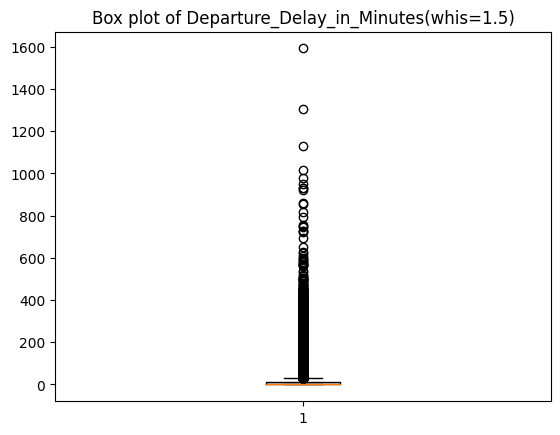

In [ ]:
plt.boxplot(encode_airline_df["Departure_Delay_in_Minutes"])
plt.title("Box plot of Departure_Delay_in_Minutes(whis=1.5)")
plt.show()

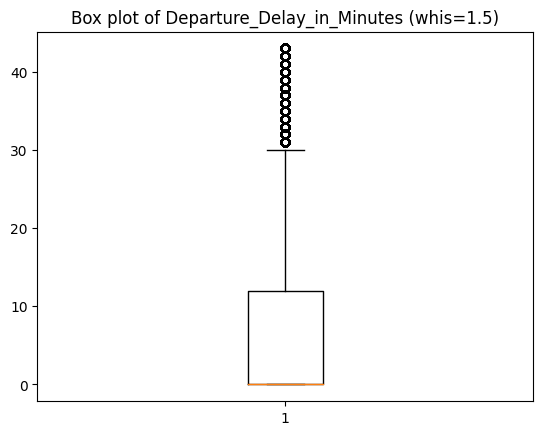

In [ ]:

from scipy.stats.mstats import winsorize

winsorized_Departure_Delay_in_Minutes = winsorize(encode_airline_df["Departure_Delay_in_Minutes"], (0, 0.10))
plt.boxplot(winsorized_Departure_Delay_in_Minutes)
plt.title("Box plot of Departure_Delay_in_Minutes (whis=1.5)")
plt.show()
encode_airline_df["winsorized_Departure_Delay_in_Minutes"] = winsorized_Departure_Delay_in_Minutes

In [ ]:
encode_airline_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129487 entries, 0 to 129879
Data columns (total 31 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   satisfaction                           129487 non-null  object 
 1   Age                                    129487 non-null  int64  
 2   Flight_Distance                        129487 non-null  int64  
 3   Seat_comfort                           129487 non-null  int64  
 4   Departure_Arrival_time_convenient      129487 non-null  int64  
 5   Food_and_drink                         129487 non-null  int64  
 6   Gate_location                          129487 non-null  int64  
 7   Inflight_wifi_service                  129487 non-null  int64  
 8   Inflight_entertainment                 129487 non-null  int64  
 9   Online_support                         129487 non-null  int64  
 10  Ease_of_Online_booking                 129487 non-null  

In [ ]:
feature_names=['winsorized_Arrival_Delay_in_Minutes', 'winsorized_Departure_Delay_in_Minutes']
target_name=['satisfaction']

# Select 50 samples and two features (for simplicity)
data_df = pd.DataFrame(encode_airline_df, columns=feature_names)
data_df = data_df[['winsorized_Arrival_Delay_in_Minutes', 'winsorized_Departure_Delay_in_Minutes']]
target_df = pd.DataFrame(encode_airline_df, columns=target_name)
target_df.columns = ['satisfaction']

# Get the min and max on the x-axis for plotting lines later
minX = data_df['winsorized_Arrival_Delay_in_Minutes'].min()
maxX = data_df['winsorized_Arrival_Delay_in_Minutes'].max()

print(data_df.head())
print(target_df.head())



   winsorized_Arrival_Delay_in_Minutes  winsorized_Departure_Delay_in_Minutes
0                                  0.0                                      0
1                                 44.0                                     43
2                                  0.0                                      0
3                                  0.0                                      0
4                                  0.0                                      0
  satisfaction
0            1
1            1
2            1
3            1
4            1


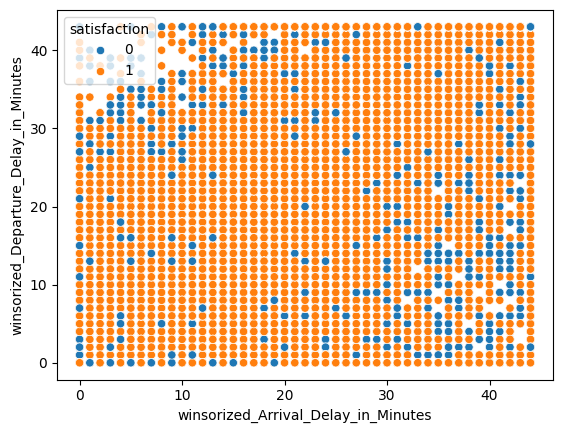

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x = 'winsorized_Arrival_Delay_in_Minutes', y = 'winsorized_Departure_Delay_in_Minutes', data = data_df, hue=target_df['satisfaction'])
plt.show()

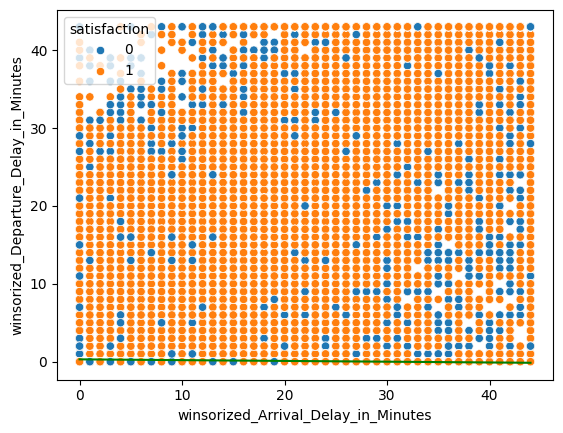

In [ ]:
def drawLine(plt, m, c, min, max):
  x = np.linspace(min, max)
  y = m * x + c
  plt.plot(x, y, 'g-')


sns.scatterplot(x = 'winsorized_Arrival_Delay_in_Minutes', y = 'winsorized_Departure_Delay_in_Minutes', data = data_df, hue=target_df['satisfaction'])
# Draw a line at some arbitrary place
drawLine(plt, -0.01, 0.3, minX, maxX)
plt.show()

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
%matplotlib inline

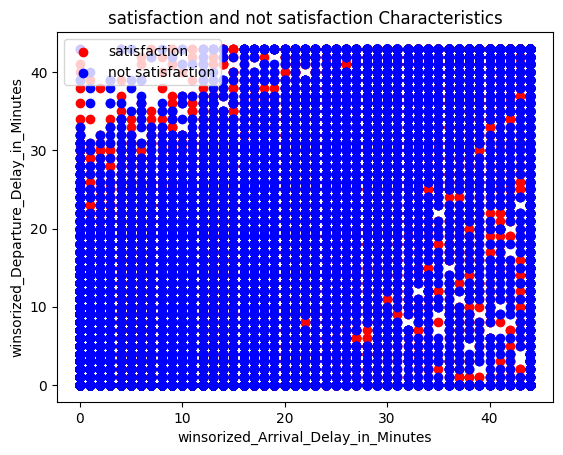

In [ ]:

# Look at the data
plt.scatter(
    encode_airline_df[encode_airline_df['satisfaction'] == 1].winsorized_Arrival_Delay_in_Minutes,
    encode_airline_df[encode_airline_df['satisfaction'] == 1].winsorized_Departure_Delay_in_Minutes,
    color='red'
)
plt.scatter(
    encode_airline_df[encode_airline_df['satisfaction'] == 0].winsorized_Arrival_Delay_in_Minutes,
    encode_airline_df[encode_airline_df['satisfaction'] == 0].winsorized_Departure_Delay_in_Minutes,
    color='blue'
)
plt.legend(['satisfaction', 'not satisfaction'])
plt.title('satisfaction and not satisfaction Characteristics')
plt.xlabel('winsorized_Arrival_Delay_in_Minutes')
plt.ylabel('winsorized_Departure_Delay_in_Minutes')
plt.show()

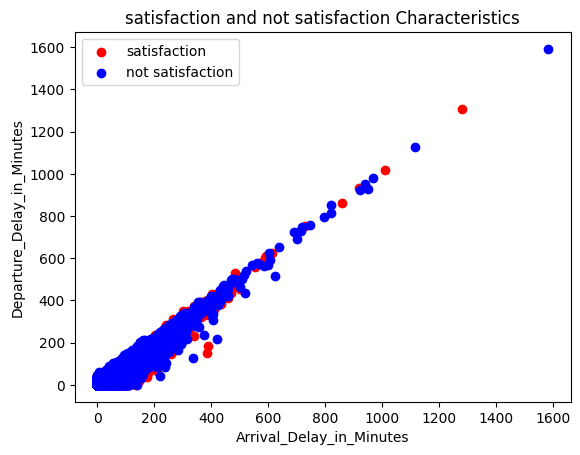

In [ ]:

# Look at the data
plt.scatter(
    encode_airline_df[encode_airline_df['satisfaction'] == 1].Arrival_Delay_in_Minutes,
    encode_airline_df[encode_airline_df['satisfaction'] == 1].Departure_Delay_in_Minutes,
    color='red'
)
plt.scatter(
    encode_airline_df[encode_airline_df['satisfaction'] == 0].Arrival_Delay_in_Minutes,
    encode_airline_df[encode_airline_df['satisfaction'] == 0].Departure_Delay_in_Minutes,
    color='blue'
)
plt.legend(['satisfaction', 'not satisfaction'])
plt.title('satisfaction and not satisfaction Characteristics')
plt.xlabel('Arrival_Delay_in_Minutes')
plt.ylabel('Departure_Delay_in_Minutes')
plt.show()

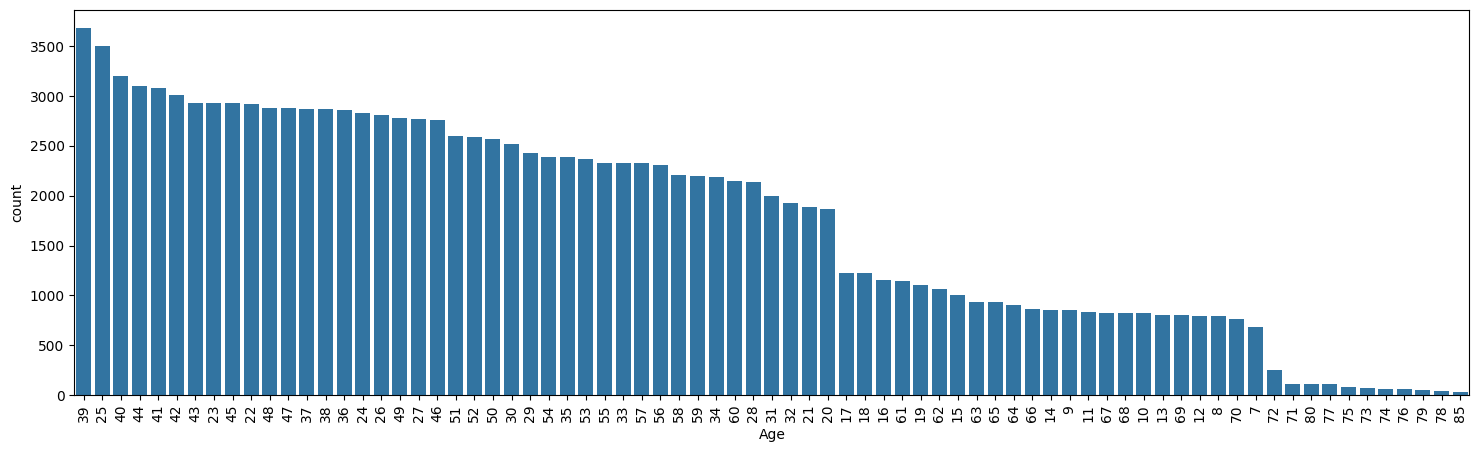

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize= (18,5))

sns.countplot(x ='Age', data=encode_airline_df, color='#1f77b4', order = encode_airline_df['Age'].value_counts().index)

plt.xticks(rotation = 90)
plt.show()

In [ ]:
y2 = encode_airline_df['satisfaction']
y2 = y2.astype('int')

In [ ]:
#X2 = encode_airline_df['Departure_Delay_in_Minutes', 'Arrival_Delay_in_Minutes', 'Seat_comfort', 'Food_and_drink', 'Inflight_wifi_service', 'Leg_room_service', 'Cleanliness']

# Select 50 samples and two features (for simplicity)
X2 = pd.DataFrame(encode_airline_df, columns=['Departure_Delay_in_Minutes', 'Arrival_Delay_in_Minutes', 'Seat_comfort', 'Food_and_drink', 'Inflight_wifi_service', 'Leg_room_service', 'Cleanliness'])
X2 = X2[['Departure_Delay_in_Minutes', 'Arrival_Delay_in_Minutes', 'Seat_comfort', 'Food_and_drink', 'Inflight_wifi_service', 'Leg_room_service', 'Cleanliness']]

print(X2.head())
print(y2.head())


   Departure_Delay_in_Minutes  Arrival_Delay_in_Minutes  Seat_comfort  \
0                           0                       0.0             0   
1                         310                     305.0             0   
2                           0                       0.0             0   
3                           0                       0.0             0   
4                           0                       0.0             0   

   Food_and_drink  Inflight_wifi_service  Leg_room_service  Cleanliness  
0               0                      2                 0            3  
1               0                      0                 4            3  
2               0                      2                 3            4  
3               0                      3                 0            1  
4               0                      4                 0            2  
0    1
1    1
2    1
3    1
4    1
Name: satisfaction, dtype: int64


In [ ]:
y.shape, X.shape

((129487,), (129487, 28))

Training the model using Linear Regression

In [ ]:
from sklearn.model_selection import train_test_split

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train2, y_train2)

LinearRegression()

In [ ]:
y_lr_train_pred2 = lr.predict(X_train2)

y_lr_test_pred2 = lr.predict(X_test2)

In [ ]:
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm
from statsmodels.tools.eval_measures import mse, rmse

X_train2 = sm.add_constant(X_train2)

In [ ]:
# Fit an OLS model using statsmodels
results = sm.OLS(y_train2, X_train2).fit()

# Print the summary results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           satisfaction   R-squared:                       0.193
Model:                            OLS   Adj. R-squared:                  0.193
Method:                 Least Squares   F-statistic:                     3539.
Date:                Mon, 22 Jan 2024   Prob (F-statistic):               0.00
Time:                        23:41:59   Log-Likelihood:                -63590.
No. Observations:              103589   AIC:                         1.272e+05
Df Residuals:                  103581   BIC:                         1.273e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

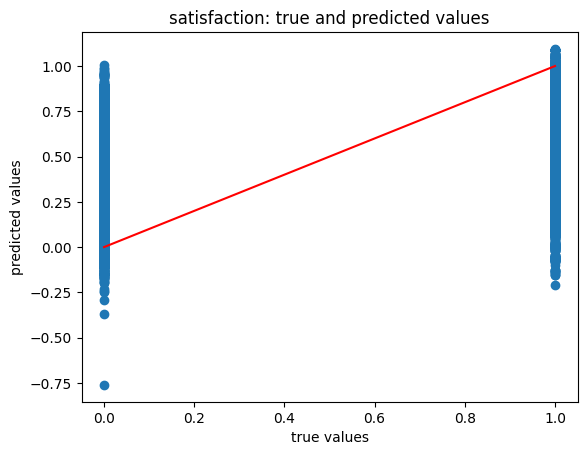

Mean absolute error of the prediction is: 0.3997511429795119
Mean squared error of the prediction is: 0.19885106059653299
Root mean squared error of the prediction is: 0.4459271920353512
Mean absolute percentage error of the prediction is: inf


In [ ]:
# Add a constant to the model because it's best practice
# to do so every time!
X_test2 = sm.add_constant(X_test2)

# You are making predictions here
y_preds2 = results.predict(X_test2)

plt.scatter(y_test2, y_preds2)
plt.plot(y_test2, y_test2, color="red")
plt.xlabel("true values")
plt.ylabel("predicted values")
plt.title("satisfaction: true and predicted values")
plt.show()

print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test2, y_preds2)))
print("Mean squared error of the prediction is: {}".format(mse(y_test2, y_preds2)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test2, y_preds2)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test2 - y_preds2) / y_test2)) * 100))



In [ ]:
y3 = encode_airline_df['satisfaction']
y3 = y3.astype('int')

#X2 = encode_airline_df['Departure_Delay_in_Minutes', 'Arrival_Delay_in_Minutes', 'Seat_comfort', 'Food_and_drink', 'Inflight_wifi_service', 'Leg_room_service', 'Cleanliness']

# Select 50 samples and two features (for simplicity)
X3 = pd.DataFrame(encode_airline_df, columns=['TravelType_Business travel', 'Gender_Male', 'Customer_Type_Loyal Customer', 'Class_Business'])
X3 = X3[['TravelType_Business travel', 'Gender_Male', 'Customer_Type_Loyal Customer', 'Class_Business']]

print(X3.head())
print(y3.head())

   TravelType_Business travel  Gender_Male  Customer_Type_Loyal Customer  \
0                           0            0                             1   
1                           0            1                             1   
2                           0            0                             1   
3                           0            0                             1   
4                           0            0                             1   

   Class_Business  
0               0  
1               1  
2               0  
3               0  
4               0  
0    1
1    1
2    1
3    1
4    1
Name: satisfaction, dtype: int64


In [ ]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size = 0.2, random_state = 465)

print("The number of observations in training set is {}".format(X_train3.shape[0]))
print("The number of observations in test set is {}".format(X_test3.shape[0]))

The number of observations in training set is 103589
The number of observations in test set is 25898


In [ ]:
X_train3.head()

,TravelType_Business travel,Gender_Male,Customer_Type_Loyal Customer,Class_Business
97224,1,0,1,1
24311,0,1,1,0
85841,1,0,1,1
60449,1,0,0,0
62925,1,0,0,0


In [ ]:
X_train3 = sm.add_constant(X_train3)

In [ ]:
X_train3.head()

,const,TravelType_Business travel,Gender_Male,Customer_Type_Loyal Customer,Class_Business
97224,1.0,1,0,1,1
24311,1.0,0,1,1,0
85841,1.0,1,0,1,1
60449,1.0,1,0,0,0
62925,1.0,1,0,0,0


In [ ]:
# Fit an OLS model using statsmodels
results3 = sm.OLS(y_train3, X_train3).fit()

# Print the summary results
print(results3.summary())

                            OLS Regression Results                            
Dep. Variable:           satisfaction   R-squared:                       0.220
Model:                            OLS   Adj. R-squared:                  0.220
Method:                 Least Squares   F-statistic:                     7286.
Date:                Mon, 22 Jan 2024   Prob (F-statistic):               0.00
Time:                        23:42:30   Log-Likelihood:                -61864.
No. Observations:              103589   AIC:                         1.237e+05
Df Residuals:                  103584   BIC:                         1.238e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

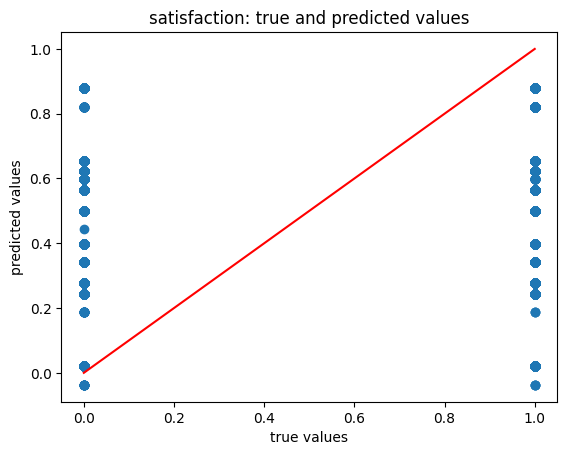

Mean absolute error of the prediction is: 0.38654372074822313
Mean squared error of the prediction is: 0.19315941412815957
Root mean squared error of the prediction is: 0.43949904906399917
Mean absolute percentage error of the prediction is: inf


In [ ]:
# Add a constant to the model because it's best practice
# to do so every time!
X_test3 = sm.add_constant(X_test3)

# You are making predictions here
y_preds3 = results3.predict(X_test3)

plt.scatter(y_test3, y_preds3)
plt.plot(y_test3, y_test3, color="red")
plt.xlabel("true values")
plt.ylabel("predicted values")
plt.title("satisfaction: true and predicted values")
plt.show()

print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test3, y_preds3)))
print("Mean squared error of the prediction is: {}".format(mse(y_test3, y_preds3)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test3, y_preds3)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test3 - y_preds3) / y_test3)) * 100))



In [ ]:
encode_airline_df.columns = encode_airline_df.columns.str.replace(' ','_')

In [ ]:
encode_airline_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129487 entries, 0 to 129879
Data columns (total 31 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   satisfaction                           129487 non-null  object 
 1   Age                                    129487 non-null  int64  
 2   Flight_Distance                        129487 non-null  int64  
 3   Seat_comfort                           129487 non-null  int64  
 4   Departure_Arrival_time_convenient      129487 non-null  int64  
 5   Food_and_drink                         129487 non-null  int64  
 6   Gate_location                          129487 non-null  int64  
 7   Inflight_wifi_service                  129487 non-null  int64  
 8   Inflight_entertainment                 129487 non-null  int64  
 9   Online_support                         129487 non-null  int64  
 10  Ease_of_Online_booking                 129487 non-null  

In [ ]:
#Improving on the previous model

# `Y` is the target variable (what you are trying to predict)
y4 = encode_airline_df['satisfaction']
y4 = y4.astype('int')

#X2 = encode_airline_df['Departure_Delay_in_Minutes', 'Arrival_Delay_in_Minutes', 'Seat_comfort', 'Food_and_drink', 'Inflight_wifi_service', 'Leg_room_service', 'Cleanliness']

# 'TravelType_Business travel', 'Gender_Male', 'Customer_Type_Loyal Customer', 'Class_Business'

# This is the interaction between Business_travel and loyal
encode_airline_df["bus_travel_loyal"] = encode_airline_df.TravelType_Business_travel * encode_airline_df.Customer_Type_Loyal_Customer

# Select 50 samples and two features (for simplicity)
X4 = pd.DataFrame(encode_airline_df, columns=['TravelType_Business_travel', 'Gender_Male', 'Customer_Type_Loyal_Customer', 'Class_Business','bus_travel_loyal'])
X4 = X4[['TravelType_Business_travel', 'Gender_Male', 'Customer_Type_Loyal_Customer', 'Class_Business','bus_travel_loyal']]

print(X4.head())
print(y4.head())


X_train4, X_test4, y_train4, y_test4 = train_test_split(X4, y4, test_size = 0.2, random_state = 465)

print("The number of observations in the training set is {}".format(X_train4.shape[0]))
print("The number of observations in the test set is {}".format(X_test4.shape[0]))

# Add a constant to the model because it's best practice
# to do so every time!
X_train4 = sm.add_constant(X_train4)

# Fit an OLS model using statsmodels
results4 = sm.OLS(y_train4, X_train4).fit()

# Print the summary results
print(results4.summary())


   TravelType_Business_travel  Gender_Male  Customer_Type_Loyal_Customer  \
0                           0            0                             1   
1                           0            1                             1   
2                           0            0                             1   
3                           0            0                             1   
4                           0            0                             1   

   Class_Business  bus_travel_loyal  
0               0                 0  
1               1                 0  
2               0                 0  
3               0                 0  
4               0                 0  
0    1
1    1
2    1
3    1
4    1
Name: satisfaction, dtype: int64
The number of observations in the training set is 103589
The number of observations in the test set is 25898
                            OLS Regression Results                            
Dep. Variable:           satisfaction   R-squared:         

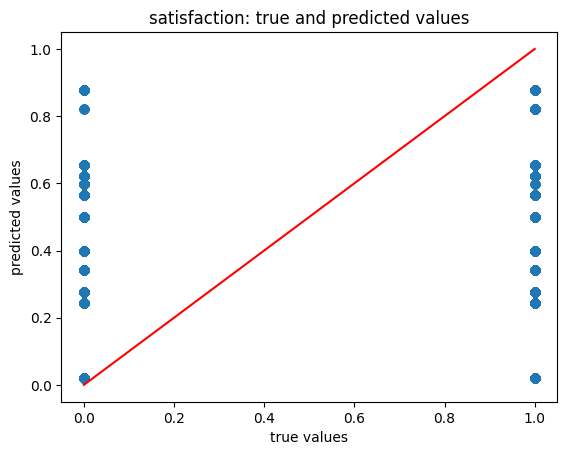

Mean absolute error of the prediction is: 0.38649160513068564
Mean squared error of the prediction is: 0.19314976339802825
Root mean squared error of the prediction is: 0.4394880696879362
Mean absolute percentage error of the prediction is: inf


In [ ]:
# Add a constant to the model because it's best practice
# to do so every time!
X_test4 = sm.add_constant(X_test4)

# You are making predictions here
y_preds4 = results4.predict(X_test4)

plt.scatter(y_test4, y_preds4)
plt.plot(y_test4, y_test4, color="red")
plt.xlabel("true values")
plt.ylabel("predicted values")
plt.title("satisfaction: true and predicted values")
plt.show()

print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test4, y_preds4)))
print("Mean squared error of the prediction is: {}".format(mse(y_test4, y_preds4)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test4, y_preds4)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test4 - y_preds4) / y_test4)) * 100))

In [ ]:
y_lr_train_pred4 = results4.predict(X_train4)

y_lr_test_pred4 = results4.predict(X_test4)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

lr_train_mse = mean_squared_error(y_train4, y_lr_train_pred4)
lr_train_r2 = r2_score(y_train4, y_lr_train_pred4)

lr_test_mse = mean_squared_error(y_test4, y_lr_test_pred4)
lr_test_r2 = r2_score(y_test4, y_lr_test_pred4)

In [ ]:
lr_results = pd.DataFrame(['OLS', lr_train_mse, lr_train_r2, lr_test_mse, lr_test_r2]).transpose()
lr_results.columns = ['Method','Training MSE','Training R2','Test MSE','Test R2']

lr_results

,Method,Training MSE,Training R2,Test MSE,Test R2
0,OLS,0.193302,0.219596,0.19315,0.221096


Training the model using Radom Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=42)

rf.fit(X_train4, y_train4)

RandomForestRegressor(random_state=42)

In [ ]:
y_rf_train_pred = rf.predict(X_train4)

y_rf_test_pred = rf.predict(X_test4)

In [ ]:
rf_train_mse = mean_squared_error(y_train4, y_rf_train_pred)
rf_train_r2 = r2_score(y_train4, y_rf_train_pred)

rf_test_mse = mean_squared_error(y_test4, y_rf_test_pred)
rf_test_r2 = r2_score(y_test4, y_rf_test_pred)

In [ ]:
rf_results = pd.DataFrame(['Random Forest Regression', rf_train_mse, rf_train_r2, rf_test_mse, rf_test_r2]).transpose()
rf_results.columns = ['Method','Training MSE','Training R2','Test MSE','Test R2']

rf_results

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Random Forest Regression,0.16269,0.343183,0.162255,0.345683


In [ ]:
df_models = pd.concat([lr_results, rf_results], axis =0)

df_models

,Method,Training MSE,Training R2,Test MSE,Test R2
0,OLS,0.193302,0.219596,0.19315,0.221096
0,Random Forest Regression,0.16269,0.343183,0.162255,0.345683


In [ ]:
df_models.reset_index(drop=True)

,Method,Training MSE,Training R2,Test MSE,Test R2
0,OLS,0.193302,0.219596,0.19315,0.221096
1,Random Forest Regression,0.16269,0.343183,0.162255,0.345683


**Conclusion**
In summary, the results show that the Random Forest Regression model outperforms the OLS model on the given dataset. It has a lower MSE, and a higher R². Therefore, in this specific case, Random Forest Regression is a more suitable model for predicting airline customer satisfaction based on these features.

Data Visualization - Prediction results Linear Regression and Random Forest

Text(0.5, 0, 'Experimental Price')

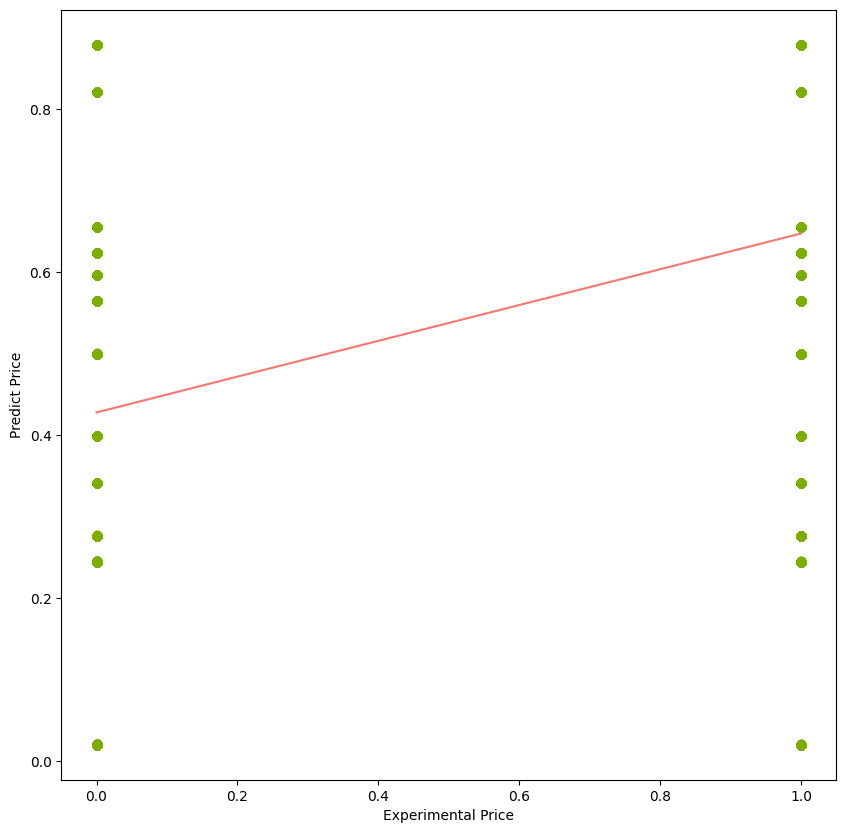

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(x=y_train4, y=y_lr_train_pred4, c='#7CAE00', alpha=0.3)

z= np.polyfit(y_train4, y_lr_train_pred4, 1)
p= np.poly1d(z)

plt.plot(y_train4, p(y_train4), '#F8766D')
plt.ylabel('Predict Price')
plt.xlabel('Experimental Price')

Text(0.5, 0, 'Experimental satisfaction')

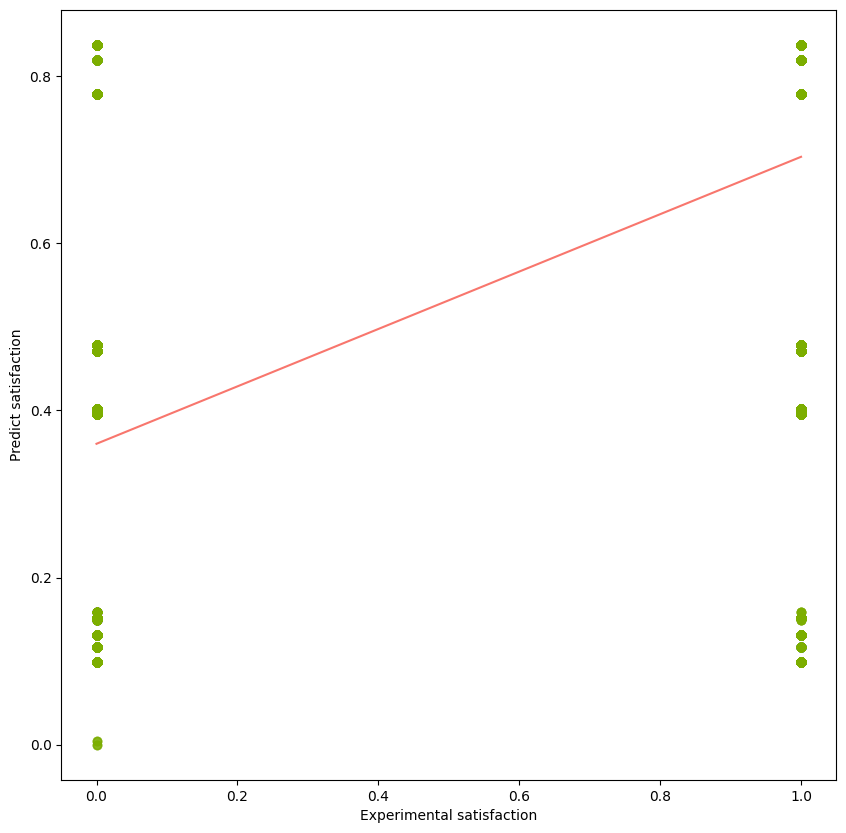

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(x=y_train4, y=y_rf_train_pred, c='#7CAE00', alpha=0.3)

z= np.polyfit(y_train4, y_rf_train_pred, 1)
p= np.poly1d(z)

plt.plot(y_train4, p(y_train4), '#F8766D')
plt.ylabel('Predict satisfaction')
plt.xlabel('Experimental satisfaction')

In [ ]:
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import confusion_matrix, precision_score, recall_score
from sklearn import ensemble

In [ ]:
# Create training and test sets.
offset = int(X2.shape[0] * 0.8)

# Put 80% of the data in the training set.
X2_train, y2_train = X2[:offset], y2[:offset]

# And put 20% in the test set.
X2_test, y2_test = X2[offset:], y2[offset:]

In [ ]:
# You'll make 500 iterations, use 2-deep trees, and set your loss function.

# It's best to update this table for the drill
# at the end of the lesson.

params = {'n_estimators': 500,
          'max_depth': 2,
          'loss': 'deviance'}

# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X2_train, y2_train)

predict_train = clf.predict(X2_train)
predict_test = clf.predict(X2_test)

In [ ]:
def plot_confusion_matrix(cm, classes,normalize,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center", verticalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization


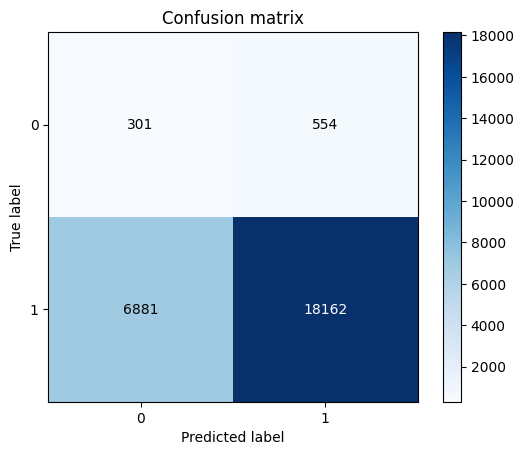

In [ ]:
cm = confusion_matrix(y2_test, predict_test)
plot_confusion_matrix(cm,[0,1],False)

Normalized confusion matrix


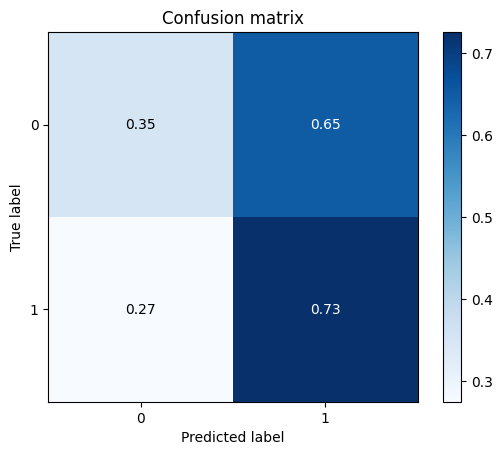

In [ ]:
cm = confusion_matrix(y2_test, predict_test)
plot_confusion_matrix(cm,[0,1],True)

In [ ]:
clf.score(X2_test, y2_test)

0.712912193991814

In [ ]:
y2_pred = clf.predict(X2_test)
precision_score(y2_test,y2_pred)

0.9703996580465911

In [ ]:
recall_score(y2_test,y2_pred)

0.7252325999281236

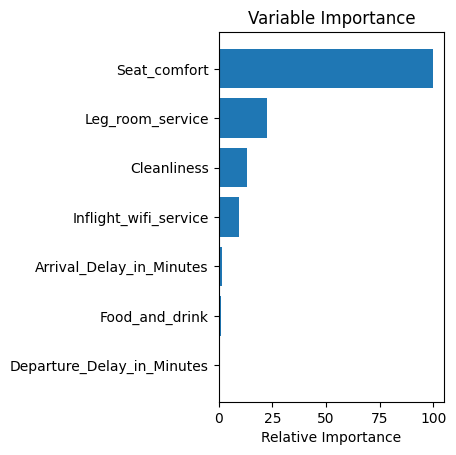

In [ ]:
feature_importance = clf.feature_importances_

# Make importances relative to max importance.
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X2.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [ ]:
y7 = encode_airline_df['satisfaction']
y7 = y7.astype('int')

#X2 = encode_airline_df['Departure_Delay_in_Minutes', 'Arrival_Delay_in_Minutes', 'Seat_comfort', 'Food_and_drink', 'Inflight_wifi_service', 'Leg_room_service', 'Cleanliness']

# Select 50 samples and two features (for simplicity)
X7 = pd.DataFrame(encode_airline_df, columns=['Seat_comfort',
'Age',
'Seat_comfort',
'Food_and_drink',
'Gate_location',
'Inflight_wifi_service',
'Inflight_entertainment',
'Online_support',
'Ease_of_Online_booking',
'On-board_service',
'Leg_room_service',
'Baggage_handling',
'Cleanliness',
'Online_boarding',
'TravelType_Business_travel',
'Gender_Female',
'Customer_Type_Loyal_Customer',
'Class_Business',
'winsorized_Arrival_Delay_in_Minutes',
'winsorized_Departure_Delay_in_Minutes'])

X7 = X7[['Seat_comfort',
'Age',
'Seat_comfort',
'Food_and_drink',
'Gate_location',
'Inflight_wifi_service',
'Inflight_entertainment',
'Online_support',
'Ease_of_Online_booking',
'On-board_service',
'Leg_room_service',
'Baggage_handling',
'Cleanliness',
'Online_boarding',
'TravelType_Business_travel',
'Gender_Female',
'Customer_Type_Loyal_Customer',
'Class_Business',
'winsorized_Arrival_Delay_in_Minutes',
'winsorized_Departure_Delay_in_Minutes']]

print(X7.head())
print(y7.head())

   Seat_comfort  Seat_comfort  Age  Seat_comfort  Seat_comfort  \
0             0             0   65             0             0   
1             0             0   47             0             0   
2             0             0   15             0             0   
3             0             0   60             0             0   
4             0             0   70             0             0   

   Food_and_drink  Gate_location  Inflight_wifi_service  \
0               0              2                      2   
1               0              3                      0   
2               0              3                      2   
3               0              3                      3   
4               0              3                      4   

   Inflight_entertainment  Online_support  ...  Leg_room_service  \
0                       4               2  ...                 0   
1                       2               2  ...                 4   
2                       0               2  .

In [ ]:
# Create training and test sets.
offset = int(X7.shape[0] * 0.8)

# Put 80% of the data in the training set.
X7_train, y7_train = X7[:offset], y7[:offset]

# And put 20% in the test set.
X7_test, y7_test = X7[offset:], y7[offset:]

In [ ]:
# You'll make 500 iterations, use 2-deep trees, and set your loss function.

# It's best to update this table for the drill
# at the end of the lesson.

params = {'n_estimators': 500,
          'max_depth': 2,
          'loss': 'deviance'}

# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X7_train, y7_train)

predict_train = clf.predict(X7_train)
predict_test = clf.predict(X7_test)

In [ ]:
def plot_confusion_matrix(cm, classes,normalize,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center", verticalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization


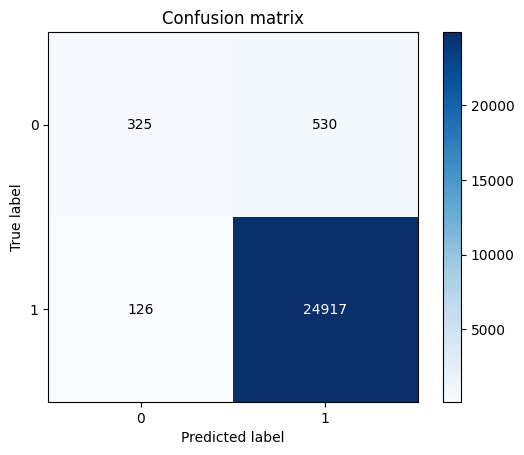

In [ ]:
cm = confusion_matrix(y7_test, predict_test)
plot_confusion_matrix(cm,[0,1],False)

Normalized confusion matrix


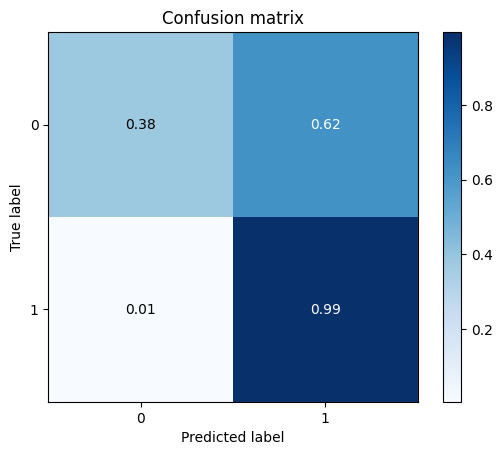

In [ ]:
cm = confusion_matrix(y7_test, predict_test)
plot_confusion_matrix(cm,[0,1],True)

In [ ]:
clf.score(X7_test, y7_test)

0.9746698586763457

In [ ]:
y7_pred = clf.predict(X7_test)
precision_score(y7_test,y7_pred)

0.9791723975321256

In [ ]:
recall_score(y7_test,y7_pred)

0.9949686539152658

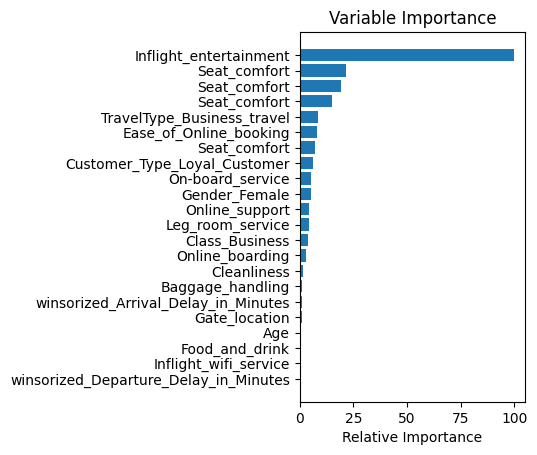

In [ ]:
feature_importance = clf.feature_importances_

# Make importances relative to max importance.
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X7.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()